# Project 1: SAT & ACT Analysis

In this project, the main focus is to analyze data from SAT and ACT college entrance  exams in 2017 and 2018. Using various methods of data analysis, visualization, and hypothesis testing, this project aims to tackle one central question - 

## Which US States should SAT focus on to drive participation?

## Executive Summary

Based on extensive analysis on the relationship between participation and scores, as well as external research to understand the market landscape - an opportunity has been identified for SAT to drive growth efforts in the US mid-west region.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:

import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from IPython.display import HTML
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14



## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Reading the data:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#First 10 rows of SAT 2017:
sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
#First 10 rows of ACT 2017:
act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
#checking descriptive statistics for the SAT 2017 dataset
sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

In [6]:
#checking descriptive statistics for the ACT 2017 dataset
act_2017.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

In [7]:
#checking rows and columns
sat_2017.shape

(51, 5)

In [8]:
#checking rows and columns - we can see that ACT has one extra. To be investigated further.
act_2017.shape

(52, 7)

In [9]:
#overview of objects in SAT 2017
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
#overview of objects in ACT 2017
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### Answer: 

Both datasets contain the average scores by state in the US. Both SAT and ACT tests include math and reading scores. While SAT tests covers writing, ACT tests students' knowledge of science. 

SAT dataset includes participation per state, average state scores for the two sections (Reading and Writing; Math), and average Total Sat score.

ACT dataset consists of participation, average scores for each section (Englsh, Math, Reading, and Science), and average composite score.


#### 4a. Does the data look complete? 

In [11]:
print(act_2017.isnull().sum())

print(sat_2017.isnull().sum())

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64


#### Answer: 
Both datasets look relatively complete with no null values. However, SAT does not have national participation data while ACT does.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### Answer:

What is the minimum possible value for each test/subtest?  
SAT Test min. = 400  
SAT Subtest min. = 200  
ACT Test/Subtest min. = 1  

What is the maximum possible value?  
SAT Test max. = 1600  
SAT Subtest max. = 800  
ACT Test/Subtest max. = 36  

Sources:  
1)https://www.princetonreview.com/college-advice/guide-to-sat-scores  
2)https://blog.prepscholar.com/whats-the-act-score-range

#### Issues identified to be corrected:
SAT
- The minimum value for Math observed is 52 - lower than the the minimim possible range in SAT scores. It could possibly be a typing error of 52 instead of 520.

ACT:

- Minimum score of Science (2.3) is on the low end compared to other subjects.
- Need to remove 'National' to standardize and compare data.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
sat_2017.sort_values(by='Math').head() #Identifying outlier in Math - SAT

State Participation  Evidence-Based Reading and Writing  \
20              Maryland           69%                                 536   
8   District of Columbia          100%                                 482   
7               Delaware          100%                                 503   
12                 Idaho           93%                                 513   
22              Michigan          100%                                 509   

    Math  Total  
20    52   1060  
8    468    950  
7    492    996  
12   493   1005  
22   495   1005

In [13]:
sat_2017['Math'] = (sat_2017['Math'].replace(52, 524)) #replacing the outlier after checking against source data

In [14]:
sat_2017.loc[sat_2017['State'] == 'Maryland'] #checking if change has been made

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536   524   1060

In [15]:
act_2017.sort_values(by='Science').head() #Identify outlier for investigation

State Participation  English  Math  Reading  Science Composite
21        Maryland           28%     23.3  23.1     24.2      2.3      23.6
29          Nevada          100%     16.3  18.0     18.1     18.2      17.8
25     Mississippi          100%     18.2  18.1     18.8     18.8      18.6
41  South Carolina          100%     17.5  18.6     19.1     18.9      18.7
34  North Carolina          100%     17.8  19.3     19.6     19.3      19.1

In [16]:
act_2017.loc[21,'Science']=23.2 #Correct outlier based on source data

In [17]:
act_2017.loc[21, 'Science'] #Confirming change made

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
#data types of SAT 2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
#data types of ACT 2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer
Participation (in both SAT and ACT) and Composite (in ACT)are currently object/strings but should be floats.   

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
act_2017['Participation'].value_counts() #checking values of participation in ACT

100%    17
29%      5
31%      3
18%      2
73%      2
67%      1
8%       1
65%      1
35%      1
75%      1
40%      1
23%      1
38%      1
80%      1
66%      1
32%      1
28%      1
 60%     1
55%      1
45%      1
98%      1
21%      1
84%      1
90%      1
62%      1
93%      1
34%      1
69%      1
Name: Participation, dtype: int64

In [21]:
def percentage_to_float(p):
    """ Removes % from the column and returns a float"""
    p = p.replace("%", "")
    
    return(float(p))

In [22]:
act_2017['Participation'] = act_2017['Participation'].map(percentage_to_float) 
#applying the function to ACT 2017

In [23]:
sat_2017['Participation'] = sat_2017['Participation'].map(percentage_to_float) 
#applying the function to SAT 2017

In [24]:
act_2017["Composite"].tail()
#checking for incorrect data in in Composite

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [25]:
act_2017[act_2017["Composite"].str.contains("x")]
#checking for incorrect data in in Composite

State  Participation  English  Math  Reading  Science Composite
51  Wyoming          100.0     19.4  19.8     20.8     20.6     20.2x

In [26]:
act_2017['Composite'] = (act_2017['Composite'].replace('20.2x', '20.2').astype(float))
#replacing data type

- Finish your data modifications by making sure the columns are now typed appropriately.

In [27]:
print(act_2017['Composite'].dtypes)
print (act_2017['Participation'].dtypes)
print (sat_2017['Participation'].dtypes)

float64
float64
float64


- Display the data types again to confirm they are correct.

In [28]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [29]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [30]:
#checking the columns
print(sat_2017.columns)
print(act_2017.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')
Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


In [31]:
# Renaming columns for SAT as per convention
sat_2017.columns = ['state', 'sat_participation_2017', 
                  'sat_ebrw_2017', 'sat_math_2017', 'sat_total_2017']

sat_2017.head()

state  sat_participation_2017  sat_ebrw_2017  sat_math_2017  \
0     Alabama                     5.0            593            572   
1      Alaska                    38.0            547            533   
2     Arizona                    30.0            563            553   
3    Arkansas                     3.0            614            594   
4  California                    53.0            531            524   

   sat_total_2017  
0            1165  
1            1080  
2            1116  
3            1208  
4            1055

In [32]:
# Renaming columns for ACT as per convention
act_2017.columns = ['state', 'act_participation_2017', 
                  'act_english_2017', 'act_math_2017', 'act_reading_2017', 'act_science_2017', 'act_composite_2017' ]

act_2017.head()

state  act_participation_2017  act_english_2017  act_math_2017  \
0  National                    60.0              20.3           20.7   
1   Alabama                   100.0              18.9           18.4   
2    Alaska                    65.0              18.7           19.8   
3   Arizona                    62.0              18.6           19.8   
4  Arkansas                   100.0              18.9           19.0   

   act_reading_2017  act_science_2017  act_composite_2017  
0              21.4              21.0                21.0  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7  
4              19.7              19.5                19.4

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|State where ACT/SAT was taken| 
|act_participation_2017|float|ACT|Percentage of students that took the ACT in 2017|
|act_english_2017|float|ACT|Average score for ACT English in 2017|
|act_math_2017|float|ACT|Average score for ACT Math in 2017|
|act_reading_2017|float|ACT|Average score for ACT Reading in 2017|
|act_science_2017|float|ACT|Average score for ACT Science in 2017|
|act_composite_2017|float|ACT|Average composite score for ACT English, Math, Reading and Science in 2017|
|sat_participation_2017|float|SAT|Percentage of students that took the SAT in 2017|
|sat_ebrw_2017|int|SAT|Average score for SAT Evidence-Based Reading & Writing (EBRW) in 2017|
|sat_math_2017|int|SAT|Average score for SAT Math in 2017|
|sat_total_2017|int|SAT|Average total score for SAT EBRW & Math in 2017|







#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
#removing national row from ACT


act_2017.drop(labels=0, inplace = True)
act_2017.head()

state  act_participation_2017  act_english_2017  act_math_2017  \
1     Alabama                   100.0              18.9           18.4   
2      Alaska                    65.0              18.7           19.8   
3     Arizona                    62.0              18.6           19.8   
4    Arkansas                   100.0              18.9           19.0   
5  California                    31.0              22.5           22.7   

   act_reading_2017  act_science_2017  act_composite_2017  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7  
4              19.7              19.5                19.4  
5              23.1              22.2                22.8

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
#Merging dataframes:

combined_sat_act_2017 = pd.merge(sat_2017, act_2017, on ='state')
combined_sat_act_2017.head()

state  sat_participation_2017  sat_ebrw_2017  sat_math_2017  \
0     Alabama                     5.0            593            572   
1      Alaska                    38.0            547            533   
2     Arizona                    30.0            563            553   
3    Arkansas                     3.0            614            594   
4  California                    53.0            531            524   

   sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
0            1165                   100.0              18.9           18.4   
1            1080                    65.0              18.7           19.8   
2            1116                    62.0              18.6           19.8   
3            1208                   100.0              18.9           19.0   
4            1055                    31.0              22.5           22.7   

   act_reading_2017  act_science_2017  act_composite_2017  
0              19.7              19.4                19.2  
1              20.4              19.9                19.8  
2              20.1              19.8                19.7  
3              19.7              19.5                19.4  
4              23.1              22.2                22.8

In [35]:
#checking datatypes of combined database
combined_sat_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_2017  51 non-null     float64
 2   sat_ebrw_2017           51 non-null     int64  
 3   sat_math_2017           51 non-null     int64  
 4   sat_total_2017          51 non-null     int64  
 5   act_participation_2017  51 non-null     float64
 6   act_english_2017        51 non-null     float64
 7   act_math_2017           51 non-null     float64
 8   act_reading_2017        51 non-null     float64
 9   act_science_2017        51 non-null     float64
 10  act_composite_2017      51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
combined_sat_act_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [37]:
#importing dataset
act_2018 = pd.read_csv("../data/act_2018_updated.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [38]:
#reviewing data
act_2018.head()

State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3    Arkansas                            100                     19.4   
4  California                             27                     22.7   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   
3                   19.1                18.9                   19.7   
4                   22.5                22.5                   23.0   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2  
3                   19.4  
4                   22.1

In [39]:
#revewing data for SAT
sat_2018.head()

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

In [40]:
#checking for null values
act_2018.isnull().sum()

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64

In [41]:
#checking for null values
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [42]:
#revewing data for ACT
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### Corrections needed:
From above, we can tell that percentage in ACT 2018 needs to be converted to float. Additionally, this needs to be renamed to 'participation'.

In [43]:
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype(float)
#applying type conversion to ACT 2018
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [44]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### Corrections needed:
From above, we can tell that participation in SAT 2018 needs to be converted to float.

In [45]:
sat_2018['Participation'] = sat_2018['Participation'].map(percentage_to_float) 
#applying the function to SAT 2018
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [46]:
# Renaming columns for SAT as per convention
sat_2018.columns = ['state', 'sat_participation_2018', 
                  'sat_ebrw_2018', 'sat_math_2018', 'sat_total_2018']

sat_2018.head()

state  sat_participation_2018  sat_ebrw_2018  sat_math_2018  \
0     Alabama                     6.0            595            571   
1      Alaska                    43.0            562            544   
2     Arizona                    29.0            577            572   
3    Arkansas                     5.0            592            576   
4  California                    60.0            540            536   

   sat_total_2018  
0            1166  
1            1106  
2            1149  
3            1169  
4            1076

In [47]:
# Renaming columns for ACT as per convention
act_2018.columns = ['state', 'act_participation_2018', 
                  'act_english_2018', 'act_math_2018', 'act_reading_2018', 'act_science_2018', 'act_composite_2018' ]

act_2018.head()

state  act_participation_2018  act_english_2018  act_math_2018  \
0     Alabama                   100.0              19.1           18.9   
1      Alaska                    33.0              20.8           19.8   
2     Arizona                    66.0              19.2           18.2   
3    Arkansas                   100.0              19.4           19.1   
4  California                    27.0              22.7           22.5   

   act_reading_2018  act_science_2018  act_composite_2018  
0              18.3              19.6                19.0  
1              20.6              21.6                20.7  
2              19.4              19.5                19.2  
3              18.9              19.7                19.4  
4              22.5              23.0                22.1

In [48]:
#merging database:

combined_sat_act_2018 = pd.merge(sat_2018, act_2018, on ='state')
combined_sat_act_2018.head()

state  sat_participation_2018  sat_ebrw_2018  sat_math_2018  \
0     Alabama                     6.0            595            571   
1      Alaska                    43.0            562            544   
2     Arizona                    29.0            577            572   
3    Arkansas                     5.0            592            576   
4  California                    60.0            540            536   

   sat_total_2018  act_participation_2018  act_english_2018  act_math_2018  \
0            1166                   100.0              19.1           18.9   
1            1106                    33.0              20.8           19.8   
2            1149                    66.0              19.2           18.2   
3            1169                   100.0              19.4           19.1   
4            1076                    27.0              22.7           22.5   

   act_reading_2018  act_science_2018  act_composite_2018  
0              18.3              19.6                19.0  
1              20.6              21.6                20.7  
2              19.4              19.5                19.2  
3              18.9              19.7                19.4  
4              22.5              23.0                22.1

In [49]:
#confirming that both dataframes are now comparable

print(combined_sat_act_2018.info())
print(combined_sat_act_2017.info())
print(combined_sat_act_2018.shape)
print(combined_sat_act_2017.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_2018  51 non-null     float64
 2   sat_ebrw_2018           51 non-null     int64  
 3   sat_math_2018           51 non-null     int64  
 4   sat_total_2018          51 non-null     int64  
 5   act_participation_2018  51 non-null     float64
 6   act_english_2018        51 non-null     float64
 7   act_math_2018           51 non-null     float64
 8   act_reading_2018        51 non-null     float64
 9   act_science_2018        51 non-null     float64
 10  act_composite_2018      51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                  Non-Null 

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [50]:
final = pd.merge(combined_sat_act_2017, combined_sat_act_2018, on ='state', how = 'outer')
final.head()

state  sat_participation_2017  sat_ebrw_2017  sat_math_2017  \
0     Alabama                     5.0            593            572   
1      Alaska                    38.0            547            533   
2     Arizona                    30.0            563            553   
3    Arkansas                     3.0            614            594   
4  California                    53.0            531            524   

   sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
0            1165                   100.0              18.9           18.4   
1            1080                    65.0              18.7           19.8   
2            1116                    62.0              18.6           19.8   
3            1208                   100.0              18.9           19.0   
4            1055                    31.0              22.5           22.7   

   act_reading_2017  act_science_2017  ...  sat_participation_2018  \
0              19.7              19.4  ...                     6.0   
1              20.4              19.9  ...                    43.0   
2              20.1              19.8  ...                    29.0   
3              19.7              19.5  ...                     5.0   
4              23.1              22.2  ...                    60.0   

   sat_ebrw_2018  sat_math_2018  sat_total_2018  act_participation_2018  \
0            595            571            1166                   100.0   
1            562            544            1106                    33.0   
2            577            572            1149                    66.0   
3            592            576            1169                   100.0   
4            540            536            1076                    27.0   

   act_english_2018  act_math_2018  act_reading_2018  act_science_2018  \
0              19.1           18.9              18.3              19.6   
1              20.8           19.8              20.6              21.6   
2              19.2           18.2              19.4              19.5   
3              19.4           19.1              18.9              19.7   
4              22.7           22.5              22.5              23.0   

   act_composite_2018  
0                19.0  
1                20.7  
2                19.2  
3                19.4  
4                22.1  

[5 rows x 21 columns]

In [51]:
final.shape

(51, 21)

In [52]:
#saving output to csv
final.to_csv('../data/final.csv')

### Updated Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|State where ACT/SAT was taken| 
|act_participation_2017|float|ACT|Percentage of students that took the ACT in 2017|
|act_english_2017|float|ACT|Average score for ACT English in 2017|
|act_math_2017|float|ACT|Average score for ACT Math in 2017|
|act_reading_2017|float|ACT|Average score for ACT Reading in 2017|
|act_science_2017|float|ACT|Average score for ACT Science in 2017|
|act_composite_2017|float|ACT|Average composite score for ACT English, Math, Reading and Science in 2017|
|sat_participation_2017|float|SAT|Percentage of students that took the SAT in 2017|
|sat_ebrw_2017|int|SAT|Average score for SAT Evidence-Based Reading & Writing (EBRW) in 2017|
|sat_math_2017|int|SAT|Average score for SAT Math in 2017|
|sat_total_2017|int|SAT|Average total score for SAT EBRW & Math in 2017|
|act_participation_2018|float|ACT|Percentage of students that took the ACT in 2018|
|act_english_2018|float|ACT|Average score for ACT English in 2018|
|act_math_2018|float|ACT|Average score for ACT Math in 2018|
|act_reading_2018|float|ACT|Average score for ACT Reading in 2018|
|act_science_2018|float|ACT|Average score for ACT Science in 2018|
|act_composite_2018|float|ACT|Average composite score for ACT English, Math, Reading and Science in 2018|
|sat_participation_2018|float|SAT|Percentage of students that took the SAT in 2018|
|sat_ebrw_2018|int|SAT|Average score for SAT Evidence-Based Reading & Writing (EBRW) in 2018|
|sat_math_2018|int|SAT|Average score for SAT Math in 2018|
|sat_total_2018|int|SAT|Average total score for SAT EBRW & Math in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
final.describe()

sat_participation_2017  sat_ebrw_2017  sat_math_2017  sat_total_2017  \
count               51.000000      51.000000      51.000000       51.000000   
mean                39.803922     569.117647     556.882353     1126.098039   
std                 35.276632      45.666901      47.121395       92.494812   
min                  2.000000     482.000000     468.000000      950.000000   
25%                  4.000000     533.500000     523.500000     1055.500000   
50%                 38.000000     559.000000     548.000000     1107.000000   
75%                 66.000000     613.000000     599.000000     1212.000000   
max                100.000000     644.000000     651.000000     1295.000000   

       act_participation_2017  act_english_2017  act_math_2017  \
count               51.000000         51.000000      51.000000   
mean                65.254902         20.931373      21.182353   
std                 32.140842          2.353677       1.981989   
min                  8.000000         16.300000      18.000000   
25%                 31.000000         19.000000      19.400000   
50%                 69.000000         20.700000      20.900000   
75%                100.000000         23.300000      23.100000   
max                100.000000         25.500000      25.300000   

       act_reading_2017  act_science_2017  act_composite_2017  \
count         51.000000         51.000000           51.000000   
mean          22.013725         21.450980           21.519608   
std            2.067271          1.739353            2.020695   
min           18.100000         18.200000           17.800000   
25%           20.450000         19.950000           19.800000   
50%           21.800000         21.300000           21.400000   
75%           24.150000         23.200000           23.600000   
max           26.000000         24.900000           25.500000   

       sat_participation_2018  sat_ebrw_2018  sat_math_2018  sat_total_2018  \
count               51.000000      51.000000      51.000000       51.000000   
mean                45.745098     563.686275     556.235294     1120.019608   
std                 37.314256      47.502627      47.772623       94.155083   
min                  2.000000     480.000000     480.000000      977.000000   
25%                  4.500000     534.500000     522.500000     1057.500000   
50%                 52.000000     552.000000     544.000000     1098.000000   
75%                 77.500000     610.500000     593.500000     1204.000000   
max                100.000000     643.000000     655.000000     1298.000000   

       act_participation_2018  act_english_2018  act_math_2018  \
count               51.000000         51.000000      51.000000   
mean                61.647059         21.486275      20.988235   
std                 34.080976          2.106278       2.446356   
min                  7.000000         17.700000      16.600000   
25%                 28.500000         19.950000      19.100000   
50%                 66.000000         21.300000      20.200000   
75%                100.000000         23.550000      23.700000   
max                100.000000         25.600000      26.000000   

       act_reading_2018  act_science_2018  act_composite_2018  
count         51.000000         51.000000           51.000000  
mean          21.125490         22.015686           21.345098  
std            2.035765          2.167245            1.870114  
min           17.800000         18.000000           17.900000  
25%           19.400000         20.450000           19.850000  
50%           20.700000         21.600000           21.100000  
75%           23.150000         24.100000           23.050000  
max           25.200000         26.100000           24.900000

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [54]:
#TO - DO
#writing the function

def std_dev(series):
    count = 0
    for i in series: 
         # with every iteration this function subtracts the mean value of a list from every ith element of a list and then raises to the second power 
        count += ((i - sum(series)/len(series))**2) 
    return (count/(len(series)))**.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [55]:
# filter for header and rows
header = list(final.columns)[1:]
rows = [std_dev(final[x]) for x in header]

# use dictionary comprehension to apply std_dev function to each numeric column in dataframe
sd = {key:value for key,value in zip(header, rows)}
sd

{'sat_participation_2017': 34.92907076664508,
 'sat_ebrw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_ebrw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_english_2018': 2.0855261815801147,
 'act_math_2018': 2.4222536143202795,
 'act_reading_2018': 2.015707255555717,
 'act_science_2018': 2.145891884510421,
 'act_composite_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### Answer:
The standard deviation from the function and numpy match up correctly, however it is slightly different from the pandas describe function.

The reason for the difference in the numbers below is the fact that the packages use a different equation to compute the standard deviation. In a nutshell, neither is "incorrect". Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.

If neccesary, one can change degree in of freedom in NumPy to change this to unbiased estimator by using ddof parameter.


In [56]:
#comparing custom function with numpy's fucntion and describe
print(std_dev(final.sat_participation_2017))  
print(np.std(final.sat_participation_2017))  
print(final.sat_participation_2017.describe())

34.92907076664508
34.92907076664508
count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: sat_participation_2017, dtype: float64


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### SAT:

In [57]:
#lowest SAT participation in 2017
final[['state','sat_participation_2017']].sort_values(by=['sat_participation_2017']).head(10)

state  sat_participation_2017
34  North Dakota                     2.0
24   Mississippi                     2.0
15          Iowa                     2.0
25      Missouri                     3.0
44          Utah                     3.0
41  South Dakota                     3.0
27      Nebraska                     3.0
49     Wisconsin                     3.0
23     Minnesota                     3.0
50       Wyoming                     3.0

In [58]:
#lowest SAT participation in 2018
final[['state','sat_participation_2018']].sort_values(by=['sat_participation_2018']).head(10)

state  sat_participation_2018
34  North Dakota                     2.0
50       Wyoming                     3.0
41  South Dakota                     3.0
27      Nebraska                     3.0
49     Wisconsin                     3.0
24   Mississippi                     3.0
15          Iowa                     3.0
44          Utah                     4.0
23     Minnesota                     4.0
18     Louisiana                     4.0

While the same few states appear back to back in low partipation rates for SAT, we can see that North Dakota has the lowest SAT participation for 2017 and 2018 continuously - this is a cause for further investigation

In [59]:
#highest SAT participation in 2017
final[['state','sat_participation_2017']].sort_values(by=['sat_participation_2017'], ascending = False).head(10)

state  sat_participation_2017
8   District of Columbia                   100.0
22              Michigan                   100.0
6            Connecticut                   100.0
7               Delaware                   100.0
29         New Hampshire                    96.0
19                 Maine                    95.0
12                 Idaho                    93.0
9                Florida                    83.0
21         Massachusetts                    76.0
39          Rhode Island                    71.0

In [60]:
#highest SAT participation in 2018
final[['state','sat_participation_2018']].sort_values(by=['sat_participation_2018'], ascending = False).head(10)

state  sat_participation_2018
5               Colorado                   100.0
6            Connecticut                   100.0
7               Delaware                   100.0
22              Michigan                   100.0
12                 Idaho                   100.0
19                 Maine                    99.0
13              Illinois                    99.0
39          Rhode Island                    97.0
29         New Hampshire                    96.0
8   District of Columbia                    92.0

Conversely, Michigan, Delaware and Connecticut are consistently at the higher end of SAT participation. This is worth looking into to analyze success strategies.

In [61]:
#understanding the overview for SAT participation
final[['sat_participation_2018', 'sat_participation_2017']].describe()

sat_participation_2018  sat_participation_2017
count               51.000000               51.000000
mean                45.745098               39.803922
std                 37.314256               35.276632
min                  2.000000                2.000000
25%                  4.500000                4.000000
50%                 52.000000               38.000000
75%                 77.500000               66.000000
max                100.000000              100.000000

In [62]:
# Comparing with participation rates
# Sorted by column 'sat_total_2017' to see the highest 5 SAT total scores

final[['state','sat_participation_2017','sat_total_2017']].sort_values(by=['sat_total_2017'], ascending=False).head()

state  sat_participation_2017  sat_total_2017
23  Minnesota                     3.0            1295
49  Wisconsin                     3.0            1291
15       Iowa                     2.0            1275
25   Missouri                     3.0            1271
16     Kansas                     4.0            1260

Minnesota, Wisconsin and Iowa lead in terms of average SAT total scores in 2017. All 5 top scoring states have a low % participation.

In [63]:
# Filtering above data for only for states where 4% or greater of students took SAT

final[final['sat_participation_2017']>4][['state','sat_participation_2017','sat_total_2017']].sort_values(by=['sat_total_2017'], ascending=False).head()

state  sat_participation_2017  sat_total_2017
42  Tennessee                     5.0            1228
5    Colorado                    11.0            1201
26    Montana                    10.0            1196
0     Alabama                     5.0            1165
35       Ohio                    12.0            1149

Upon filtering for over 4% participation (derived from 25% percentile of SAT participation), we can see that the landscape of high scoring states dramatically changes. 

In [64]:
# Comparing with participation rate
# Sorted by column 'sat_total_2018' to see the highest 5 SAT total scores

final[['state','sat_participation_2018','sat_total_2018']].sort_values(by=['sat_total_2018'], ascending=False).head()

state  sat_participation_2018  sat_total_2018
23     Minnesota                     4.0            1298
49     Wisconsin                     3.0            1294
34  North Dakota                     2.0            1283
15          Iowa                     3.0            1265
16        Kansas                     4.0            1265

Similar to 2017, Minnesota and Wisconsin appear to have the highest average scores.

In [65]:
# Filtering above data for only for states where 4% or greater of students took SAT

final[final['sat_participation_2018']>4][['state','sat_participation_2018','sat_total_2018']].sort_values(by=['sat_total_2018'], ascending=False).head()

state  sat_participation_2018  sat_total_2018
42  Tennessee                     6.0            1231
26    Montana                    10.0            1198
3    Arkansas                     5.0            1169
0     Alabama                     6.0            1166
2     Arizona                    29.0            1149

But once again, after filtering for participation, the top 5 states are now different. This suggests a relationship between participation and average scores, to be explored further in this analysis.

#### ACT:

In [66]:
# lowest ACT participation in 2017
final[['state','act_participation_2017']].sort_values(by=['act_participation_2017']).head(10)

state  act_participation_2017
19          Maine                     8.0
29  New Hampshire                    18.0
7        Delaware                    18.0
39   Rhode Island                    21.0
38   Pennsylvania                    23.0
20       Maryland                    28.0
45        Vermont                    29.0
21  Massachusetts                    29.0
22       Michigan                    29.0
46       Virginia                    29.0

In comparison to SAT, the low end of ACT participation percentages are higher across the US. Maine has the lowest percentage particpation for 2017.

In [67]:
# lowest ACT participation in 2018
final[['state','act_participation_2018']].sort_values(by=['act_participation_2018']).head(10)

state  act_participation_2018
19          Maine                     7.0
39   Rhode Island                    15.0
29  New Hampshire                    16.0
7        Delaware                    17.0
38   Pennsylvania                    20.0
22       Michigan                    22.0
47     Washington                    24.0
45        Vermont                    24.0
46       Virginia                    24.0
21  Massachusetts                    25.0

Similar to the previous year, Maine again has the lowest participation (7%) for ACT. However the total number of the low end (under 25% participation) has grown from 5 to 9 states in 2018.

In [68]:
#highest ACT Participation in 2017
final[['state','act_participation_2017']].sort_values(by=['act_participation_2017'], ascending=False).head(20)

state  act_participation_2017
0          Alabama                   100.0
17        Kentucky                   100.0
49       Wisconsin                   100.0
44            Utah                   100.0
42       Tennessee                   100.0
40  South Carolina                   100.0
36        Oklahoma                   100.0
33  North Carolina                   100.0
28          Nevada                   100.0
26         Montana                   100.0
24     Mississippi                   100.0
23       Minnesota                   100.0
18       Louisiana                   100.0
25        Missouri                   100.0
50         Wyoming                   100.0
5         Colorado                   100.0
3         Arkansas                   100.0
34    North Dakota                    98.0
13        Illinois                    93.0
11          Hawaii                    90.0

Further confirming the insight above, the higher end of ACT participation is also more widespread with 17 states having 100% participation in ACT in 2017.

In [69]:
#highest ACT participation in 2018
final[['state','act_participation_2018']].sort_values(by=['act_participation_2018'], ascending=False).head(18)

state  act_participation_2018
0          Alabama                   100.0
17        Kentucky                   100.0
49       Wisconsin                   100.0
44            Utah                   100.0
42       Tennessee                   100.0
40  South Carolina                   100.0
36        Oklahoma                   100.0
35            Ohio                   100.0
33  North Carolina                   100.0
28          Nevada                   100.0
27        Nebraska                   100.0
26         Montana                   100.0
24     Mississippi                   100.0
18       Louisiana                   100.0
25        Missouri                   100.0
50         Wyoming                   100.0
3         Arkansas                   100.0
23       Minnesota                    99.0

ACT participation across states remains high in 2018, with 17 states having more than 99% participation in the year.

In [70]:
#understanding the overview for ACT participation
final[['act_participation_2018', 'act_participation_2017']].describe()

act_participation_2018  act_participation_2017
count               51.000000               51.000000
mean                61.647059               65.254902
std                 34.080976               32.140842
min                  7.000000                8.000000
25%                 28.500000               31.000000
50%                 66.000000               69.000000
75%                100.000000              100.000000
max                100.000000              100.000000

In [71]:
# Comparing with participation rates
# Sorted by column 'act_composite_2017' to see the highest 5 ACT composite scores

final[['state','act_participation_2017','act_composite_2017']].sort_values(by=['act_composite_2017'], ascending=False).head()

state  act_participation_2017  act_composite_2017
29         New Hampshire                    18.0                25.5
21         Massachusetts                    29.0                25.4
6            Connecticut                    31.0                25.2
19                 Maine                     8.0                24.3
8   District of Columbia                    32.0                24.2

At first glance, New Hampshire, Massachusetts, and Connecticut appear to have the highest average composite scores for ACT.

In [72]:
# Filtering above data for only for states where 30% or greater of students took ACT

final[final['act_participation_2017']>30][['state','act_participation_2017','act_composite_2017']].sort_values(by=['act_composite_2017'], ascending=False).head()

state  act_participation_2017  act_composite_2017
6            Connecticut                    31.0                25.2
32              New York                    31.0                24.2
8   District of Columbia                    32.0                24.2
30            New Jersey                    34.0                23.9
4             California                    31.0                22.8

After filtering for participation % we can see that the top 5 states look very different. The participation % filter is increased to account for higher mean participation for ACT vs SAT

In [73]:
# Comparing with participation rates
# Sorted by column 'act_composite_2018' to see the highest 5 ACT composite scores

final[['state','act_participation_2018','act_composite_2018']].sort_values(by=['act_composite_2018'], ascending=False).head()

state  act_participation_2018  act_composite_2018
6     Connecticut                    26.0                24.9
21  Massachusetts                    25.0                24.7
29  New Hampshire                    16.0                24.4
32       New York                    27.0                24.2
22       Michigan                    22.0                23.9

In [74]:
# Filtering above data for only for states where 35% or greater of students took ACT

final[final['act_participation_2018']>35][['state','act_participation_2018','act_composite_2018']].sort_values(by=['act_composite_2018'], ascending=False).head()

state  act_participation_2018  act_composite_2018
13      Illinois                    43.0                23.4
41  South Dakota                    77.0                22.2
12         Idaho                    36.0                22.1
15          Iowa                    68.0                22.0
16        Kansas                    71.0                21.5

Consistent with previous year and consistent with ACT results, the top 5 scoring states change with participation % is above mean.

It is interesting to note that the highest scoring scores tend to have a low participation percentage. While correlation does NOT mean causation, it is important to conduct data analysis to confirm this, and try to determine any inverse effects between the two.

Potential hypthesis could be that only the smartest (higher-percentile)students in the low-participation state apply and give the ACT/SATs, thereby bringing the average scores up as a result.

In [75]:
#filtering database for only states with 100% participation in either SAT/ACT in 2017/2018
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][
(final['act_participation_2017'] == 100) | (final['sat_participation_2017'] == 100) | (final['sat_participation_2018'] == 100) | (final['sat_participation_2018'] == 100)
]

state  sat_participation_2017  sat_total_2017  \
0                Alabama                     5.0            1165   
3               Arkansas                     3.0            1208   
5               Colorado                    11.0            1201   
6            Connecticut                   100.0            1041   
7               Delaware                   100.0             996   
8   District of Columbia                   100.0             950   
12                 Idaho                    93.0            1005   
17              Kentucky                     4.0            1247   
18             Louisiana                     4.0            1198   
22              Michigan                   100.0            1005   
23             Minnesota                     3.0            1295   
24           Mississippi                     2.0            1242   
25              Missouri                     3.0            1271   
26               Montana                    10.0            1196   
28                Nevada                    26.0            1116   
33        North Carolina                    49.0            1081   
36              Oklahoma                     7.0            1047   
40        South Carolina                    50.0            1064   
42             Tennessee                     5.0            1228   
44                  Utah                     3.0            1238   
49             Wisconsin                     3.0            1291   
50               Wyoming                     3.0            1230   

    sat_participation_2018  sat_total_2018  act_participation_2017  \
0                      6.0            1166                   100.0   
3                      5.0            1169                   100.0   
5                    100.0            1025                   100.0   
6                    100.0            1053                    31.0   
7                    100.0             998                    18.0   
8                     92.0             977                    32.0   
12                   100.0            1001                    38.0   
17                     4.0            1248                   100.0   
18                     4.0            1210                   100.0   
22                   100.0            1011                    29.0   
23                     4.0            1298                   100.0   
24                     3.0            1236                   100.0   
25                     4.0            1262                   100.0   
26                    10.0            1198                   100.0   
28                    23.0            1140                   100.0   
33                    52.0            1098                   100.0   
36                     8.0            1062                   100.0   
40                    55.0            1070                   100.0   
42                     6.0            1231                   100.0   
44                     4.0            1010                   100.0   
49                     3.0            1294                   100.0   
50                     3.0            1257                   100.0   

    act_composite_2017  act_participation_2018  act_composite_2018  
0                 19.2                   100.0                19.0  
3                 19.4                   100.0                19.4  
5                 20.8                    30.0                23.5  
6                 25.2                    26.0                24.9  
7                 24.1                    17.0                23.4  
8                 24.2                    32.0                23.0  
12                22.3                    36.0                22.1  
17                20.0                   100.0                20.1  
18                19.5                   100.0                19.1  
22                24.1                    22.0                23.9  
23                21.5                    99.0                21.4  
24             

One key observation can be made from this table, namely -

Colorado has seen a large bump in SAT participation between 2017 and 2018. This occurs along with a 200 point dip in SAT scores. It is important to hypothesize and understand why this may have been the case - and if participation is inversely related to total scores. Colorado has also seen a 70% decline in ACT participation, and has seen an increase in average composite score from 20.8 to 23.5.

In [76]:
#filtering database for only states with over 50% participation in both SAT/ACT in both 2017 & 2018
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][
(final['act_participation_2017'] > 50) & (final['sat_participation_2017'] > 50) 
& 
(final['sat_participation_2018'] > 50) & (final['sat_participation_2018'] > 50)
]

state  sat_participation_2017  sat_total_2017  sat_participation_2018  \
9   Florida                    83.0            1017                    56.0   
10  Georgia                    61.0            1050                    70.0   
11   Hawaii                    55.0            1085                    56.0   

    sat_total_2018  act_participation_2017  act_composite_2017  \
9             1099                    73.0                19.8   
10            1064                    55.0                21.4   
11            1010                    90.0                19.0   

    act_participation_2018  act_composite_2018  
9                     66.0                19.5  
10                    53.0                21.4  
11                    89.0                19.0

In [77]:
#descriptive statistics on this filtered dataset
final[['sat_total_2017','sat_total_2018','act_composite_2017','act_composite_2018']][
(final['act_participation_2017'] > 50) & (final['sat_participation_2017'] > 50) 
& 
(final['sat_participation_2018'] > 50) & (final['sat_participation_2018'] > 50)
].mean()

sat_total_2017        1050.666667
sat_total_2018        1057.666667
act_composite_2017      20.066667
act_composite_2018      19.966667
dtype: float64

In [78]:
#comparing against average of all states
final[['sat_total_2017','sat_total_2018','act_composite_2017','act_composite_2018']].mean()

sat_total_2017        1126.098039
sat_total_2018        1120.019608
act_composite_2017      21.519608
act_composite_2018      21.345098
dtype: float64

The national (unweighted) average for SAT and ACT scores is higher compared against states with over 50% participation in both tests. This may suggest that greater participation in only one test is more beneficial towards driving higher average scores.

In [79]:
#filtering database for only states which saw an increase in ACT participation in 2018
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][
(final['act_participation_2018'] - final['act_participation_2017']>= 20)] 

state  sat_participation_2017  sat_total_2017  sat_participation_2018  \
35  Ohio                    12.0            1149                    18.0   

    sat_total_2018  act_participation_2017  act_composite_2017  \
35            1099                    75.0                22.0   

    act_participation_2018  act_composite_2018  
35                   100.0                20.4

For further analysis, it would be interesting to see what drove a 25% bump ACT participation in Ohio - and if any lessons can be learned for the SAT.

In [80]:
#filtering database for only states which saw an increase in SAT participation in 2018
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][
(final['sat_participation_2018'] - final['sat_participation_2017']>= 30)] 

state  sat_participation_2017  sat_total_2017  sat_participation_2018  \
5   Colorado                    11.0            1201                   100.0   
13  Illinois                     9.0            1115                    99.0   

    sat_total_2018  act_participation_2017  act_composite_2017  \
5             1025                   100.0                20.8   
13            1019                    93.0                21.4   

    act_participation_2018  act_composite_2018  
5                     30.0                23.5  
13                    43.0                23.4

Clearly, it makes sense to undertand why Colorado and Illinois have seen such dramatic changes in SAT participation.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

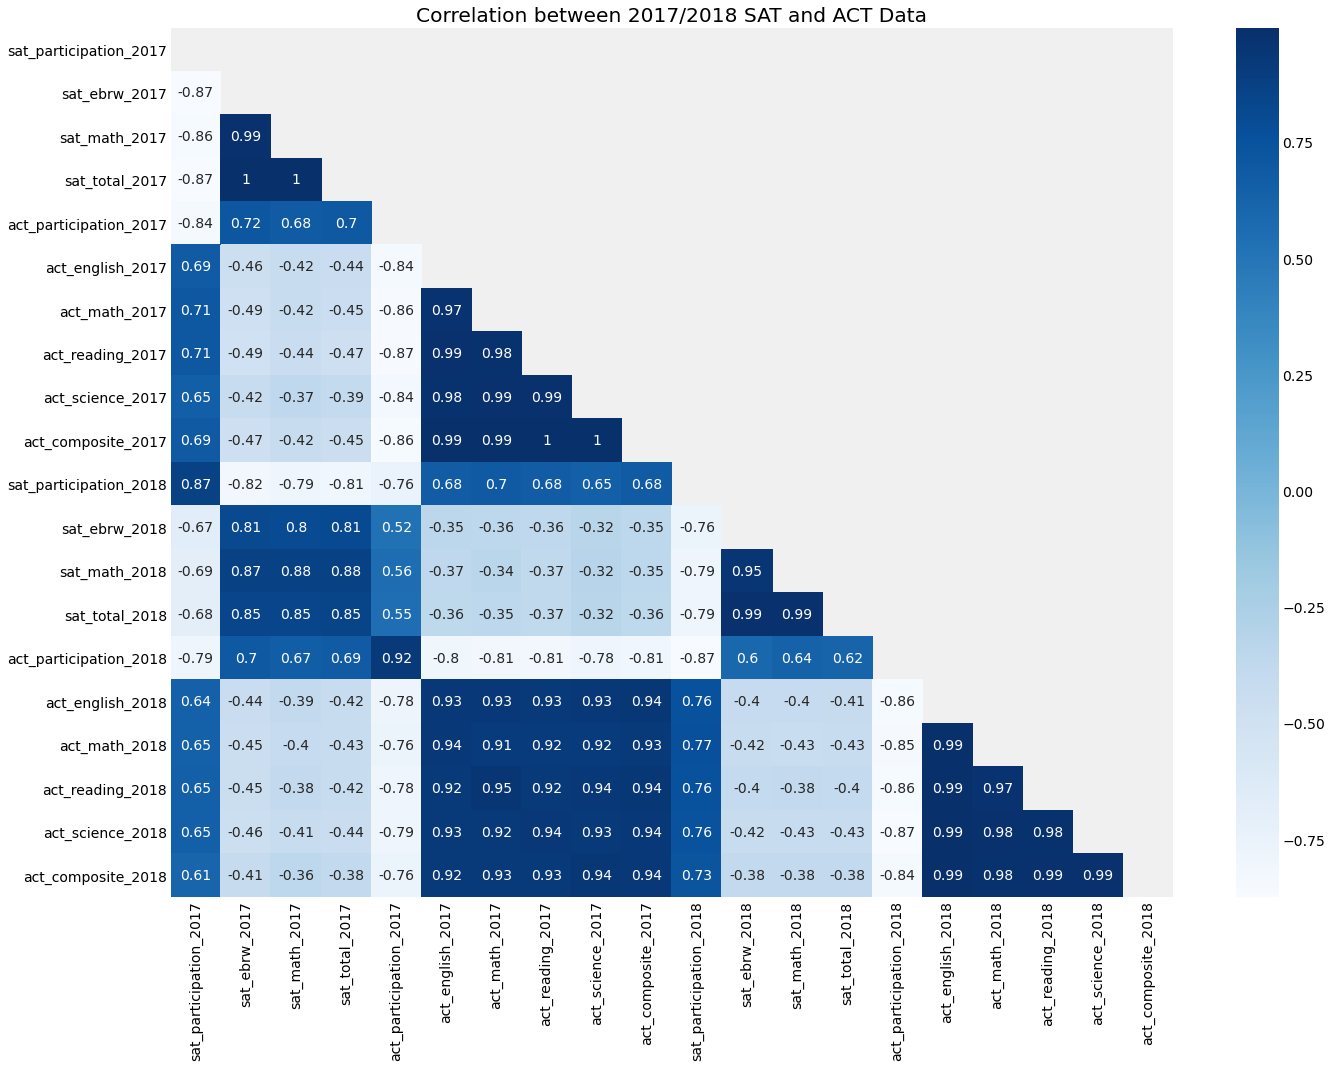

In [81]:
plt.figure(figsize=(20,16))
corr = final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotting the correlation heatmap, and masking the upper triangle 
sns.heatmap(corr, mask = mask, annot=True, cmap='Blues')
plt.title('Correlation between 2017/2018 SAT and ACT Data');



From the heatmap above, we can observe a possible negative correlation between ACT composite and ACT participation, as well as SAT total and SAT participation.

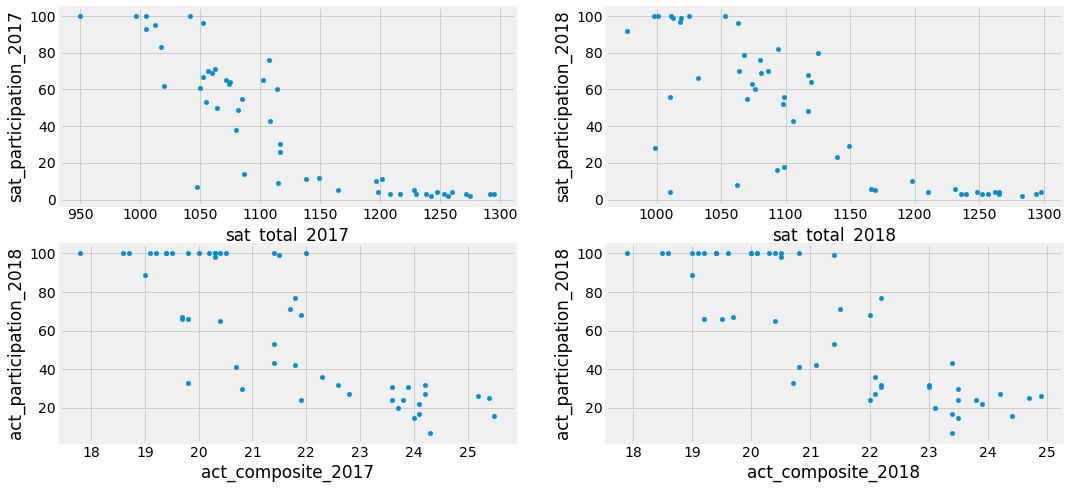

In [82]:
#checking to see if any relationship between participation and scores
fig, axes = plt.subplots(2,2, figsize=(16,8));
final.plot(kind='scatter', x='sat_total_2017', y='sat_participation_2017', ax=axes[0][0]);
final.plot(kind='scatter', x='sat_total_2018', y='sat_participation_2018', ax=axes[0][1]);
final.plot(kind='scatter', x='act_composite_2017', y='act_participation_2018', ax=axes[1][0]);
final.plot(kind='scatter', x='act_composite_2018', y='act_participation_2018', ax=axes[1][1]);

Prima-facie, there appears to be an inverse relationship between participation and scores, for both SAT and ACT in both 2017 and 2018. 

However, we cannot only rely on raw average scores because these averages are biased by participation rates. 

The lowest participating states would tend to have above average students taking the test, so states with low participation rates have artificially higher SAT / ACT scores.

This results in bias and therefore this relationship can be discarded for the scope of this project.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [83]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabels):
    sns.set_style('whitegrid') # Set seaborn style to increase contrast
    
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,16)) 
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].axvline(dataframe[column].mean(), c='red')
        
    # plot titles and xlabels    
    for i, ax in enumerate(ax):
        ax.set_title('{}'.format(list_of_titles[i]))
        ax.set_xlabel(xlabels)
        ax.set_ylabel('Frequency')

    # adjust spacings between axes
    plt.subplots_adjust(wspace=.25, hspace=.25)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [84]:
# create subsets/filters for plotting
totals = ['sat_total_2017', 'sat_total_2018', 'act_composite_2017','act_composite_2018']
participation = ['sat_participation_2017','sat_participation_2017','act_participation_2017','act_participation_2018']
math = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']
reading = ['sat_ebrw_2017','sat_ebrw_2018','act_reading_2017','act_reading_2018']

# create title lists
total_titles = ['SAT 17 Total', 'SAT 18 TOTAL', 'ACT 17 Composite','ACT 18 Composite']
participation_titles = ['SAT 17 Participation Rate','SAT 18 Participation Rate','ACT 17 Participation Rate','ACT 18 Participation Rate']
math_titles = ['SAT 17 Math','SAT 18 Math','ACT 17 Math','ACT 18 Math']
reading_titles = ['SAT 17 EBRW','SAT 18 EBRW','ACT 17 Reading','ACT 18 Reading']

# create xlabels
total_xlabels = 'Total'
participation_xlabels = 'Participation'
math_xlabels = 'Math Scores'
reading_xlabels = 'Reading Scores'

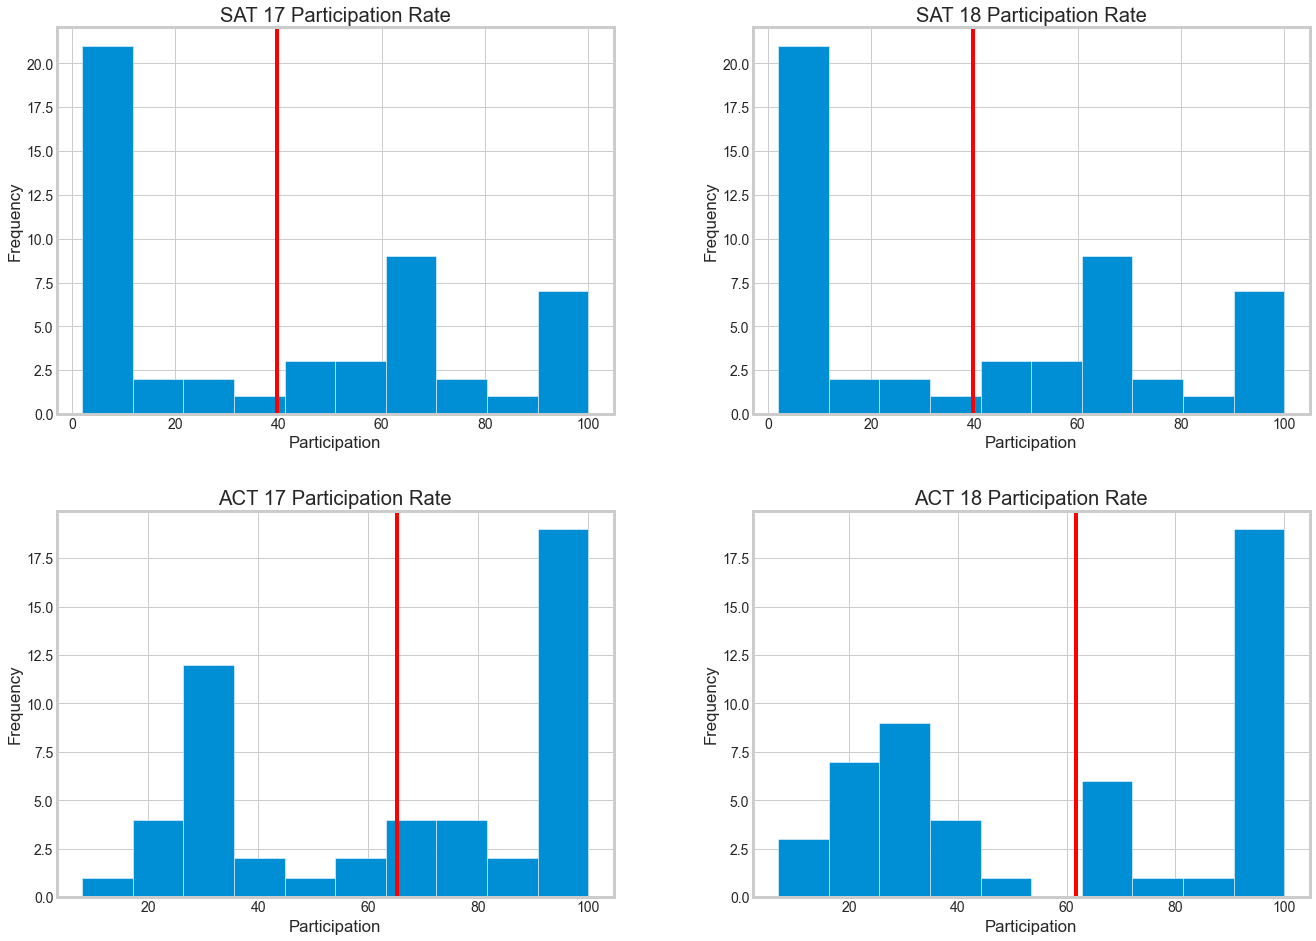

In [85]:
subplot_histograms(final, participation, participation_titles, participation_xlabels);

In 2018, there were 17 states where 0-10% of students took the SAT, while the ACT has only one. In general, the ACT appears to be more widely taken than SAT. Across both years, participation percentage appears to remain relatively stable, though the mean of SAT participation has decreased slightly.

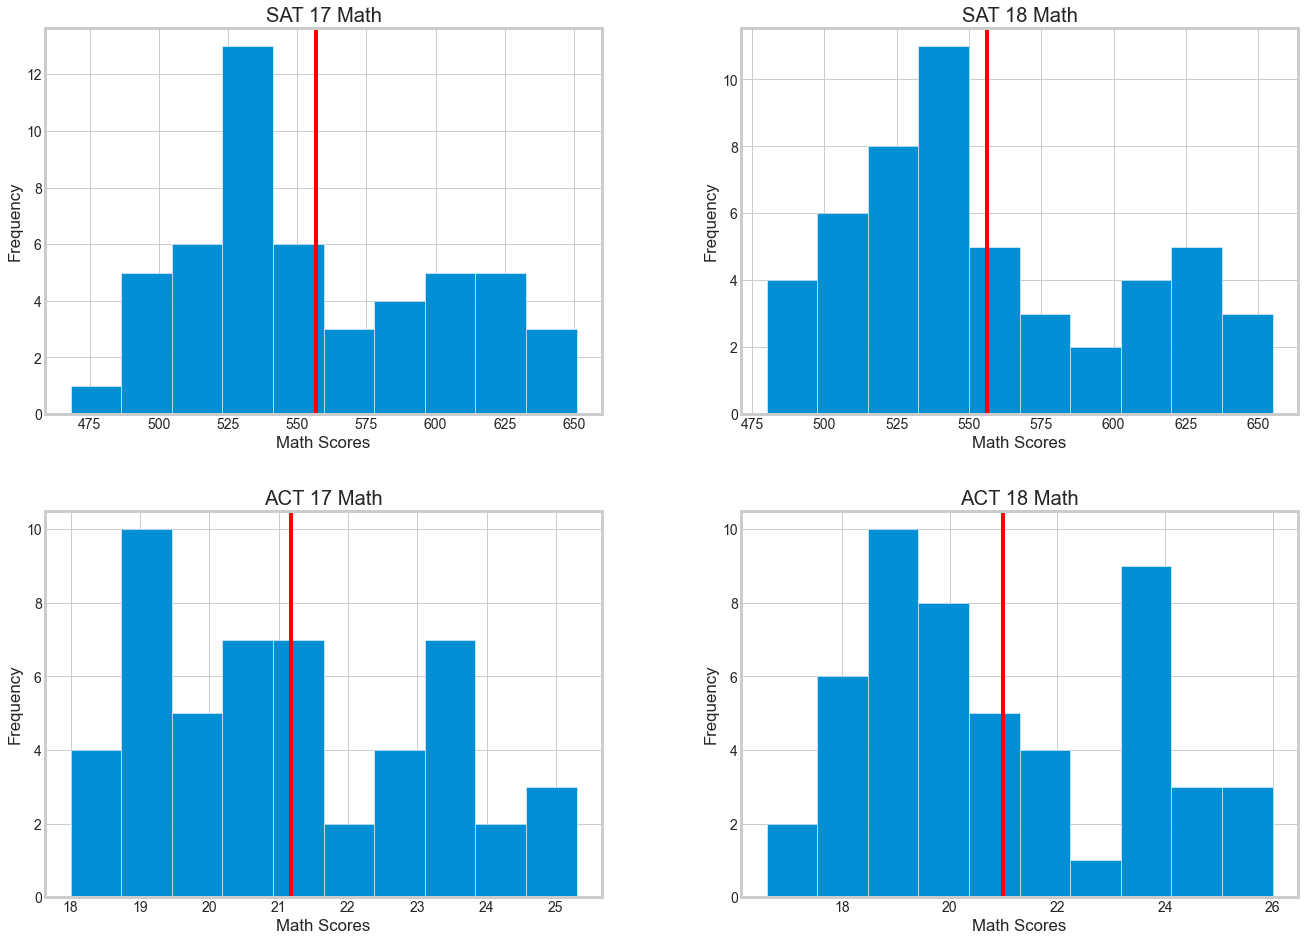

In [86]:
subplot_histograms(final, math, math_titles, math_xlabels);

Both SAT math and ACT remains stable over the two years, however we can see that there are a greater number of states with above-average ACT scores in 2018. 

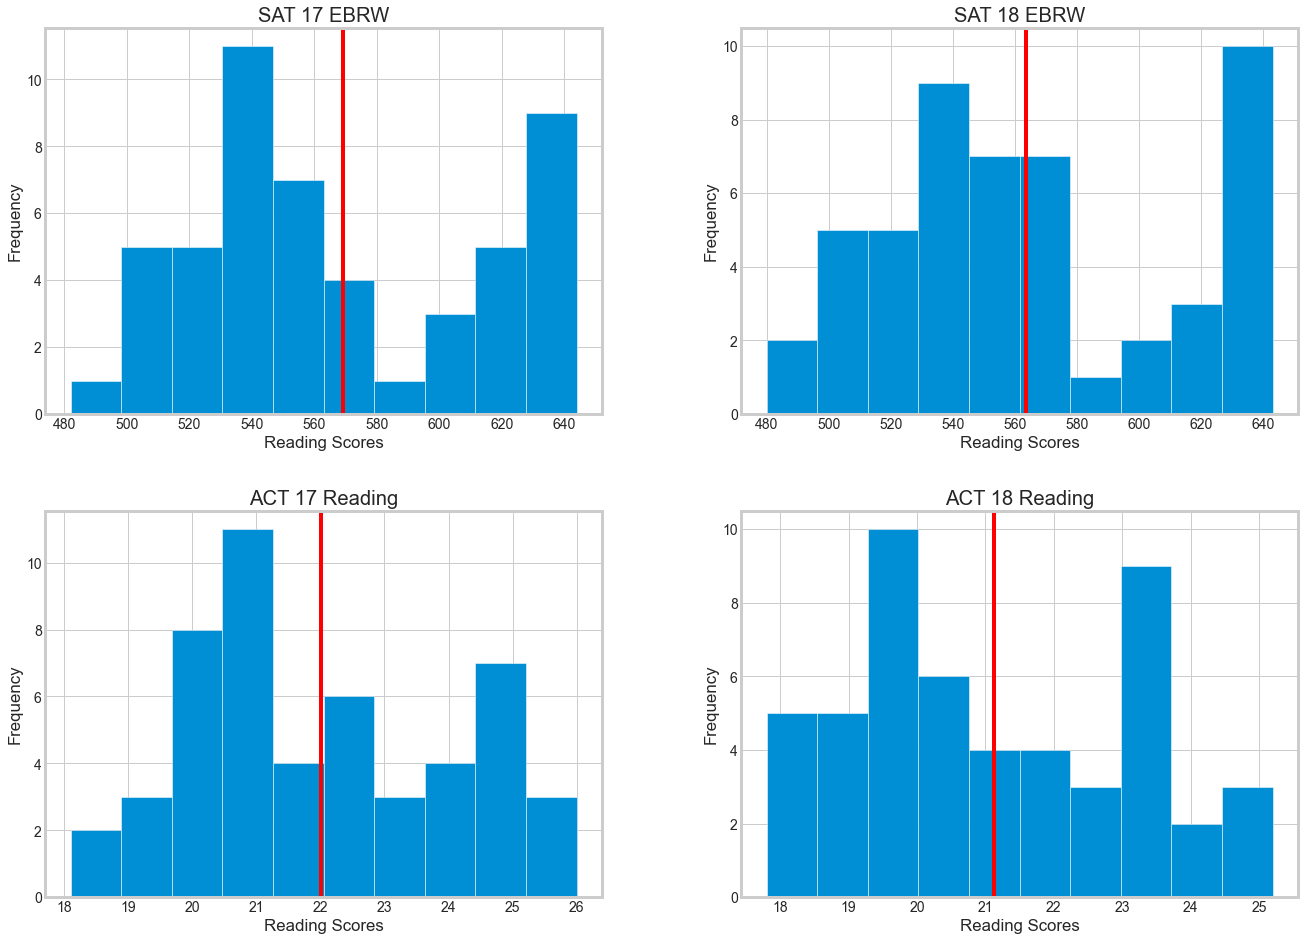

In [87]:
subplot_histograms(final, reading, reading_titles, reading_xlabels);

Interestingly, the average of reading scores in the ACT has decreased in 2018.

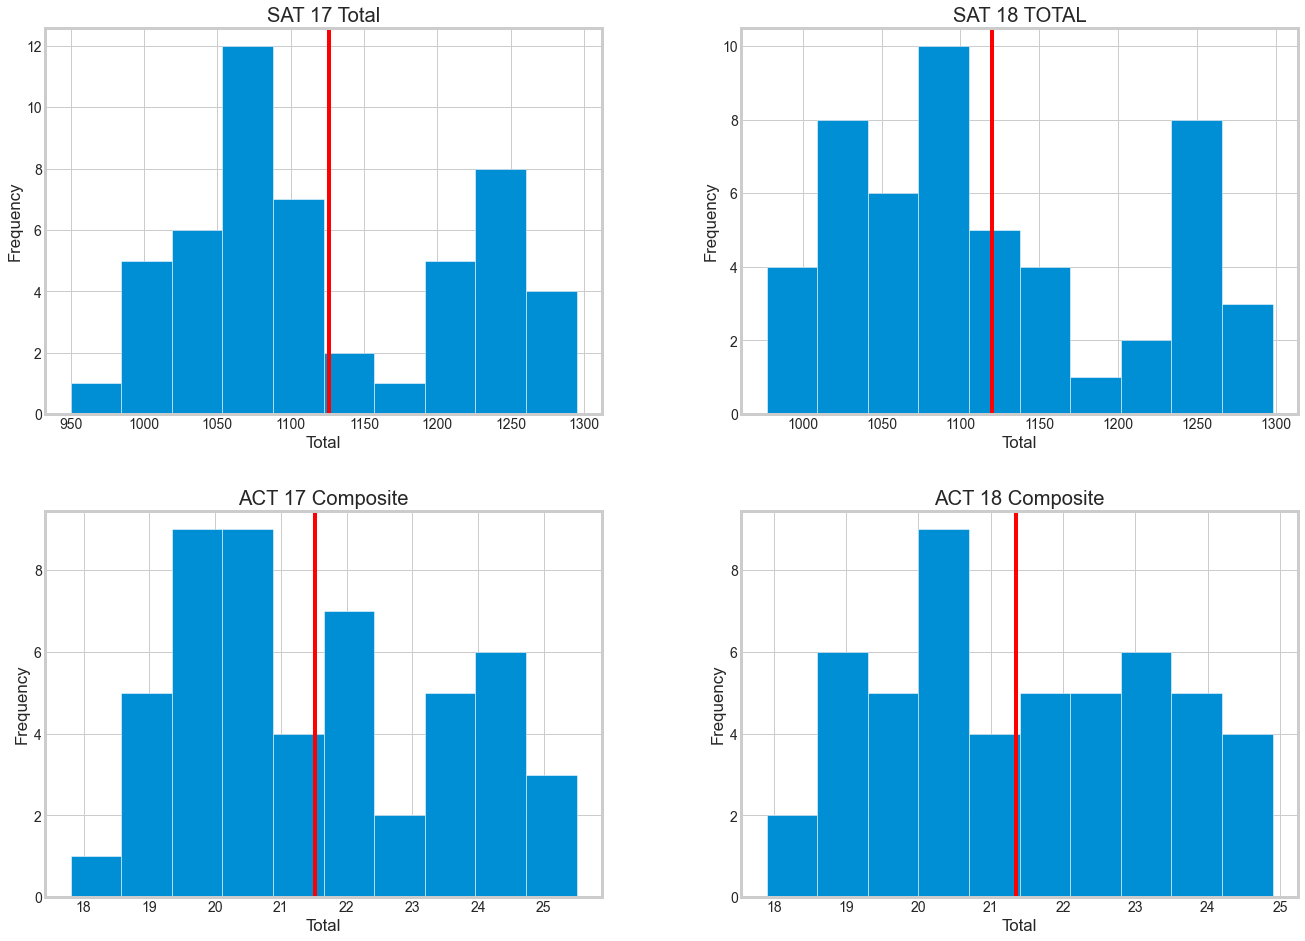

In [88]:
subplot_histograms(final, totals, total_titles, total_xlabels);

From an extra piece of analysis, we can see that the distribution of totals is more normalized, with a slight right skew.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


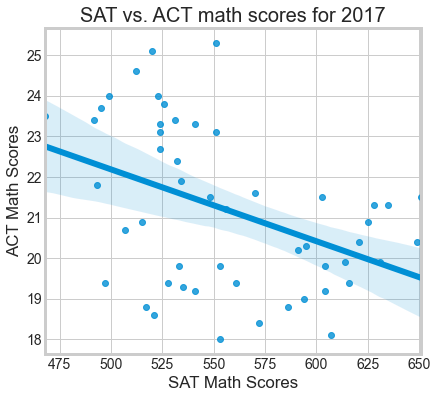

In [89]:
# plot the Figure object
fig = plt.figure(figsize=(6,6))

# adding 2017 Math from both SAT and ACT
ax1 = fig.add_subplot()
sns.regplot(data=final, x='sat_math_2017', y='act_math_2017')

# adding title and labels
plt.xlabel('SAT Math Scores')
plt.ylabel('ACT Math Scores')
plt.title("SAT vs. ACT math scores for 2017", fontsize=20);


There appears to be a negative correlation between ACT Math and SAT Math scores in 2017.

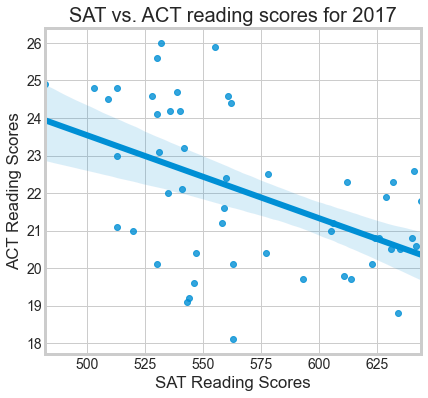

In [90]:
# plot the Figure object
fig = plt.figure(figsize=(6,6))

# adding 2017 Reading from both SAT and ACT
ax1 = fig.add_subplot()
sns.regplot(data=final, x='sat_ebrw_2017', y='act_reading_2017')

# adding title and labels
plt.xlabel('SAT Reading Scores')
plt.ylabel('ACT Reading Scores')
plt.title("SAT vs. ACT reading scores for 2017", fontsize=20);



Similar to Math, ACT and SAT scores also seem to have an inverse relationship.

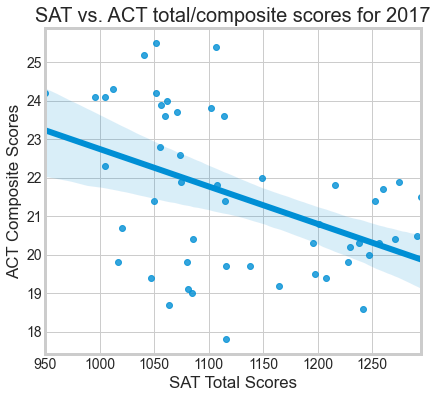

In [91]:
# plot the Figure object
fig = plt.figure(figsize=(6,6))

# adding 2017 Composite/Total from both SAT and ACT
ax1 = fig.add_subplot()
sns.regplot(data=final, x='sat_total_2017', y='act_composite_2017')

# adding title and labels
plt.xlabel('SAT Total Scores')
plt.ylabel('ACT Composite Scores')
plt.title("SAT vs. ACT total/composite scores for 2017", fontsize=20);



Further confirming the above observations, total scores for SAT and ACT also seem to be inversely proportional

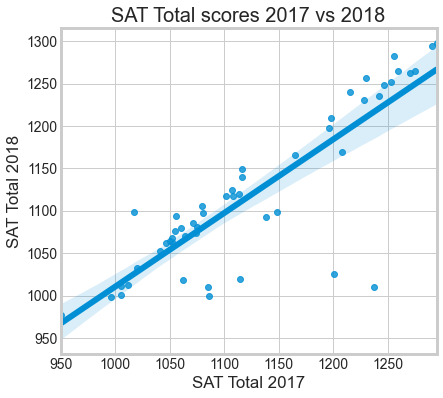

In [92]:
# plot the Figure object
fig = plt.figure(figsize=(6,6))

# adding 2018 and 2017 totals from SAT
ax1 = fig.add_subplot()
sns.regplot(data=final, x='sat_total_2017', y='sat_total_2018')

# adding title and labels
plt.xlabel('SAT Total 2017')
plt.ylabel('SAT Total 2018')
plt.title("SAT Total scores 2017 vs 2018", fontsize=20);



Unsurprisingly, SAT scores for 2017 and 2018 appear to be strongly correlated. 

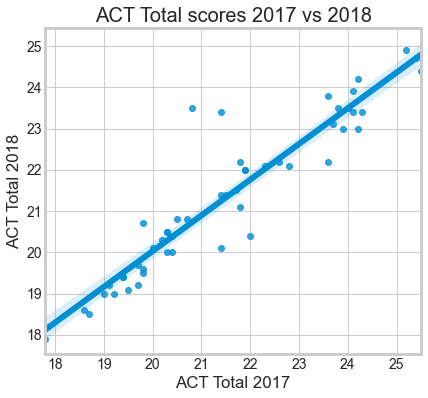

In [93]:
# plot the Figure object
fig = plt.figure(figsize=(6,6))

# adding 2018 and 2017 totals from ACT
ax1 = fig.add_subplot()
sns.regplot(data=final, x='act_composite_2017', y='act_composite_2018')

# adding title and labels
plt.xlabel('ACT Total 2017')
plt.ylabel('ACT Total 2018')
plt.title("ACT Total scores 2017 vs 2018", fontsize=20);




While the plots of SAT vs ACT show a regression line with a negative slope, we see positive slopes in the scatterplots for the same exam across multiple years. This is indicative that  higher a state performed on either test in 2017, the higher they are likely to have performed on that same test in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

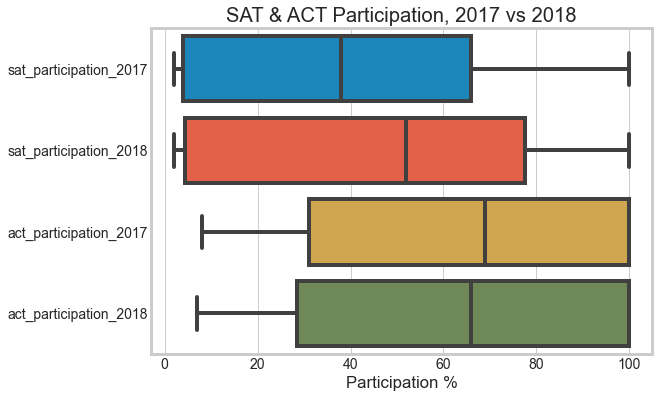

In [94]:
sns.boxplot(data=final[['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017','act_participation_2018']], 
            orient = 'h' 
).set(
xlabel='Participation %',
title = 'SAT & ACT Participation, 2017 vs 2018');

Interestingly, the median SAT participation has increased in 2018 while the median ACT participation has slightly decreased. In general, ACT participation continues to be much higher than that of SAT.

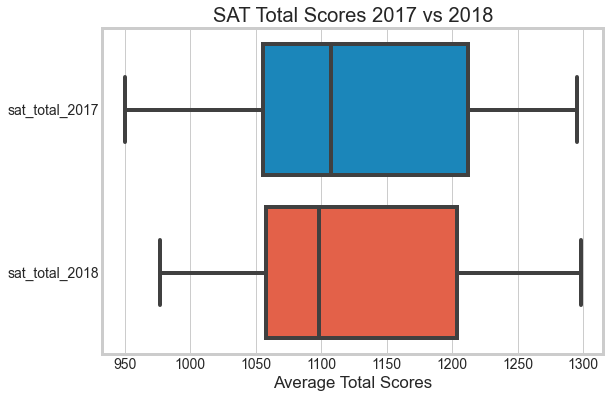

In [95]:
sns.boxplot(data=final[['sat_total_2017', 'sat_total_2018']], 
            orient = 'h' 
).set(
xlabel='Average Total Scores',
title = 'SAT Total Scores 2017 vs 2018');

We can see that the inter-quartile range for SAT scores has remained similar, however it may be worth analyzing this by splitting into subjects.

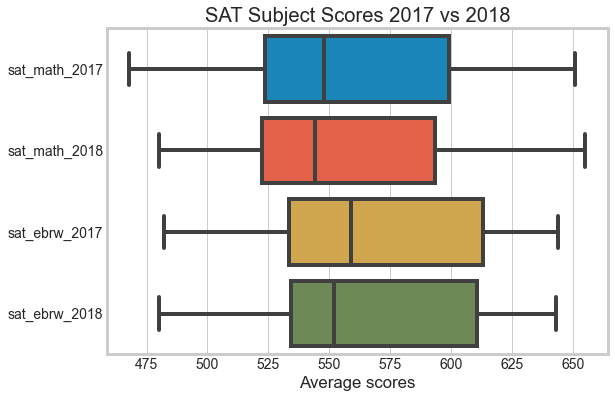

In [96]:
#Plotting SAT Subject Scores 2017 vs 2018

sns.boxplot(data=final[['sat_math_2017', 'sat_math_2018', 'sat_ebrw_2017', 'sat_ebrw_2018']], orient = 'h' 
           
).set(
xlabel='Average scores',
title = 'SAT Subject Scores 2017 vs 2018');

The observed spread of SAT math across 2 years shows no outliers. We can see that the inter-quartile range has narrowed slightly and the median Math score has slightly decreased. Additionally, the minimum scoring state has also increased compared to 2017. 

The observed spread of SAT EBRW across 2 years shows no outliers either. The inter-quartile range remains consistent and and the median score has slightly decreased.

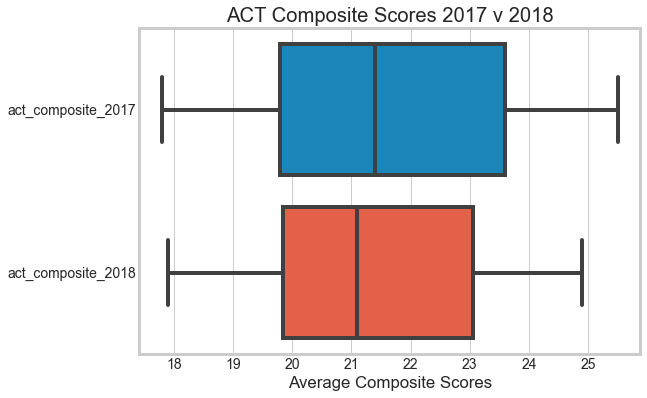

In [97]:
sns.boxplot(data=final[['act_composite_2017', 'act_composite_2018']], 
            orient = 'h' 
).set(
xlabel='Average Composite Scores',
title = 'ACT Composite Scores 2017 v 2018');

In contrast with SAT, the higher end of the IQR has decreased. This warrants further investigation into the various subject scores.

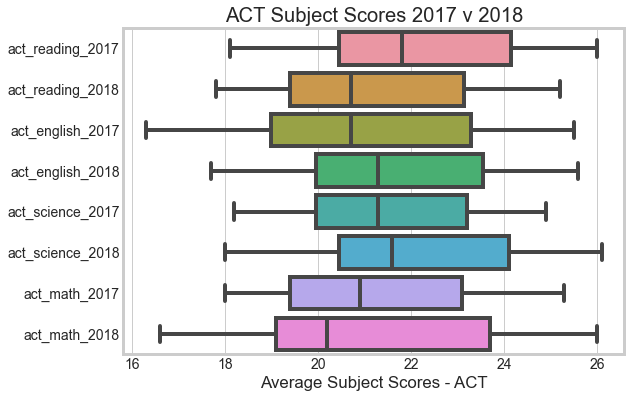

In [98]:
sns.boxplot(data=final[['act_reading_2017', 'act_reading_2018', 'act_english_2017', 'act_english_2018', 'act_science_2017', 'act_science_2018', 'act_math_2017', 'act_math_2018']], 
            orient = 'h' 
).set(
xlabel='Average Subject Scores - ACT',
title = 'ACT Subject Scores 2017 v 2018');

This sub-analysis sheds some light into the deviation of ACT scores over the 2 years. It is clear that ACT reading scores have dipped over the 2 years, while english and science have seen an increase. Math has also seen a decrease in 2018, however it has a wider spread.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Answer:** Both Colorado and Illinois have seen a dramatic shift in SAT participation from 2017 and 2018. It is important to investigate this - starting with Colorado for testing.

In [99]:
#creating a new mini dataframe for Colorado
colorado = final.loc[final['state'] == 'Colorado']

colorado

state  sat_participation_2017  sat_ebrw_2017  sat_math_2017  \
5  Colorado                    11.0            606            595   

   sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
5            1201                   100.0              20.1           20.3   

   act_reading_2017  act_science_2017  ...  sat_participation_2018  \
5              21.2              20.9  ...                   100.0   

   sat_ebrw_2018  sat_math_2018  sat_total_2018  act_participation_2018  \
5            519            506            1025                    30.0   

   act_english_2018  act_math_2018  act_reading_2018  act_science_2018  \
5              23.9           23.9              23.2              24.4   

   act_composite_2018  
5                23.5  

[1 rows x 21 columns]

In [100]:
#melting the dataframe to align all values vertically
colorado = pd.melt(colorado)
colorado

variable     value
0                    state  Colorado
1   sat_participation_2017        11
2            sat_ebrw_2017       606
3            sat_math_2017       595
4           sat_total_2017      1201
5   act_participation_2017       100
6         act_english_2017      20.1
7            act_math_2017      20.3
8         act_reading_2017      21.2
9         act_science_2017      20.9
10      act_composite_2017      20.8
11  sat_participation_2018       100
12           sat_ebrw_2018       519
13           sat_math_2018       506
14          sat_total_2018      1025
15  act_participation_2018        30
16        act_english_2018      23.9
17           act_math_2018      23.9
18        act_reading_2018      23.2
19        act_science_2018      24.4
20      act_composite_2018      23.5

In [101]:
colorado.drop(index = 0, inplace = True)
#removing first row
colorado

variable value
1   sat_participation_2017    11
2            sat_ebrw_2017   606
3            sat_math_2017   595
4           sat_total_2017  1201
5   act_participation_2017   100
6         act_english_2017  20.1
7            act_math_2017  20.3
8         act_reading_2017  21.2
9         act_science_2017  20.9
10      act_composite_2017  20.8
11  sat_participation_2018   100
12           sat_ebrw_2018   519
13           sat_math_2018   506
14          sat_total_2018  1025
15  act_participation_2018    30
16        act_english_2018  23.9
17           act_math_2018  23.9
18        act_reading_2018  23.2
19        act_science_2018  24.4
20      act_composite_2018  23.5

In [102]:
#creating a 2017 version for comparison
colorado_2017 = colorado.iloc[:10,:]
colorado_2017.columns = ['2017', '2017_value']
colorado_2017.reset_index(drop=True)

2017 2017_value
0  sat_participation_2017         11
1           sat_ebrw_2017        606
2           sat_math_2017        595
3          sat_total_2017       1201
4  act_participation_2017        100
5        act_english_2017       20.1
6           act_math_2017       20.3
7        act_reading_2017       21.2
8        act_science_2017       20.9
9      act_composite_2017       20.8

In [103]:
#creating a 2018 version for comparison
colorado_2018 = colorado.iloc[10:,:]
colorado_2018.columns = ['2018', '2018_value']
colorado_2018.reset_index(drop=True)

2018 2018_value
0  sat_participation_2018        100
1           sat_ebrw_2018        519
2           sat_math_2018        506
3          sat_total_2018       1025
4  act_participation_2018         30
5        act_english_2018       23.9
6           act_math_2018       23.9
7        act_reading_2018       23.2
8        act_science_2018       24.4
9      act_composite_2018       23.5

In [104]:
# merging into a new DF for comparison
new_colorado_df = pd.concat([colorado_2017.reset_index(drop=True), colorado_2018.reset_index(drop=True)], axis=1)
new_colorado_df

2017 2017_value                    2018 2018_value
0  sat_participation_2017         11  sat_participation_2018        100
1           sat_ebrw_2017        606           sat_ebrw_2018        519
2           sat_math_2017        595           sat_math_2018        506
3          sat_total_2017       1201          sat_total_2018       1025
4  act_participation_2017        100  act_participation_2018         30
5        act_english_2017       20.1        act_english_2018       23.9
6           act_math_2017       20.3           act_math_2018       23.9
7        act_reading_2017       21.2        act_reading_2018       23.2
8        act_science_2017       20.9        act_science_2018       24.4
9      act_composite_2017       20.8      act_composite_2018       23.5

In [105]:
#dropping duplicate label
new_colorado_df.drop('2018', axis = 1, inplace = True)

In [106]:
#replacing the row labels to be agnostic of year
new_colorado_df['2017'] = new_colorado_df['2017'].map(lambda x: x.replace("_2017",""))
new_colorado_df.columns = ['Numerical values', '2017', '2018']


In [107]:
#setting the comparison values as new index for charting
new_colorado_df.set_index('Numerical values', inplace = True)
new_colorado_df

2017  2018
Numerical values             
sat_participation    11   100
sat_ebrw            606   519
sat_math            595   506
sat_total          1201  1025
act_participation   100    30
act_english        20.1  23.9
act_math           20.3  23.9
act_reading        21.2  23.2
act_science        20.9  24.4
act_composite      20.8  23.5

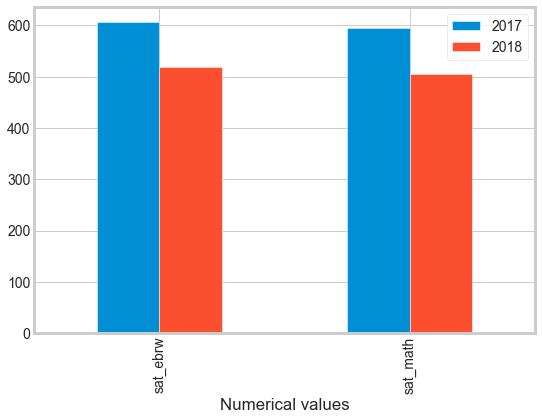

In [108]:
new_colorado_df.iloc[1:3,:].plot(kind='bar');

Both EBRW and math saw a drop in 2018 after increased participation - however this does not shed any insight into why the participation increased.

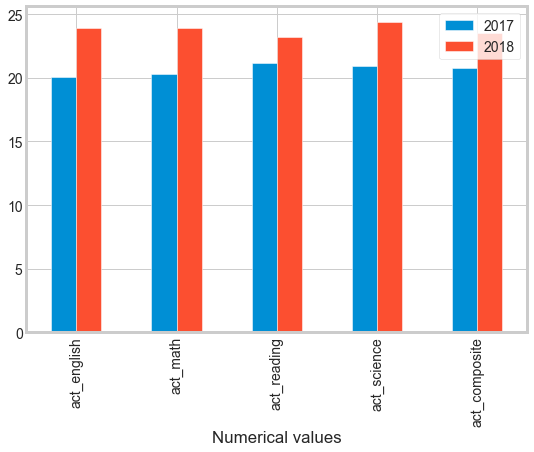

In [109]:
new_colorado_df.iloc[5:,:].plot(kind='bar');

While ACT scores jumped across the table, it is difficult to say why without external research.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

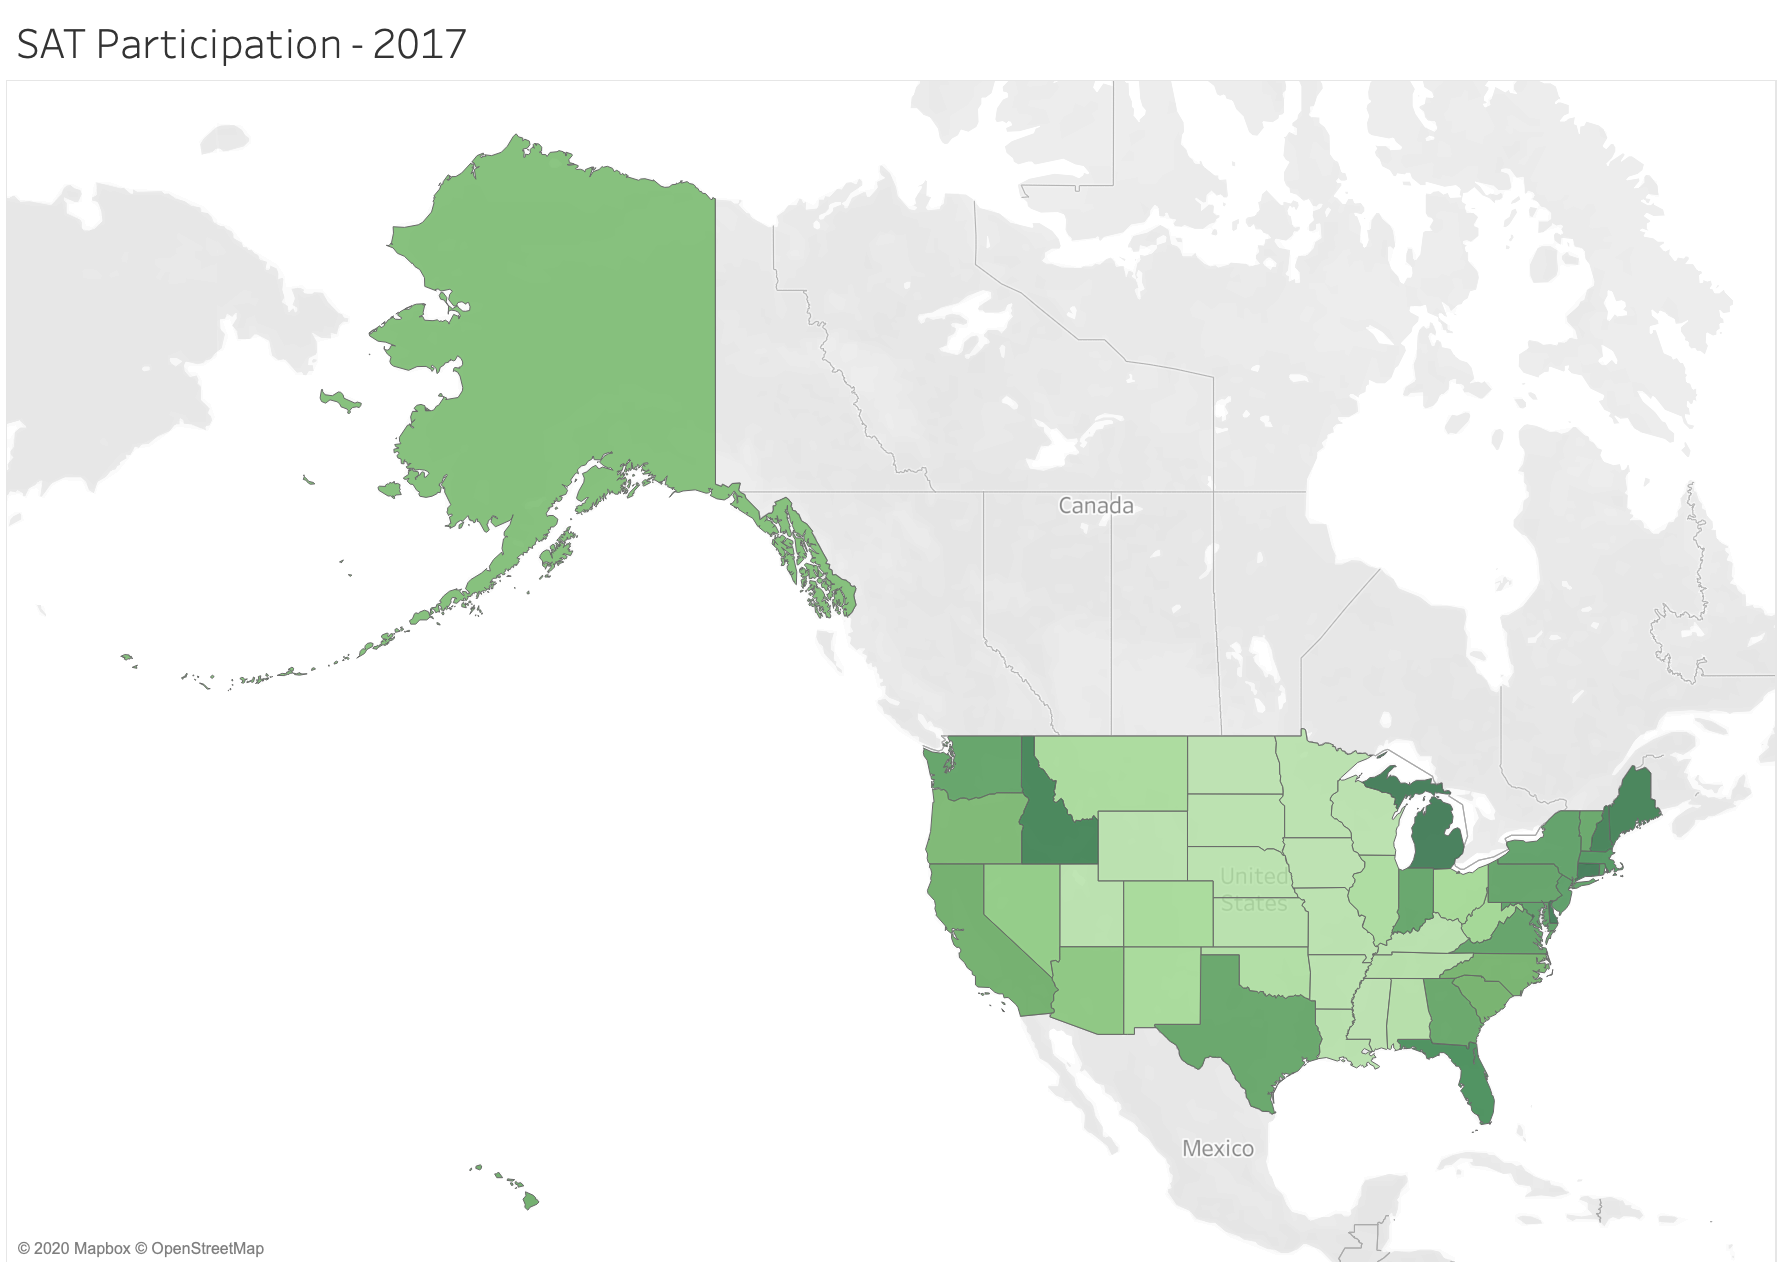

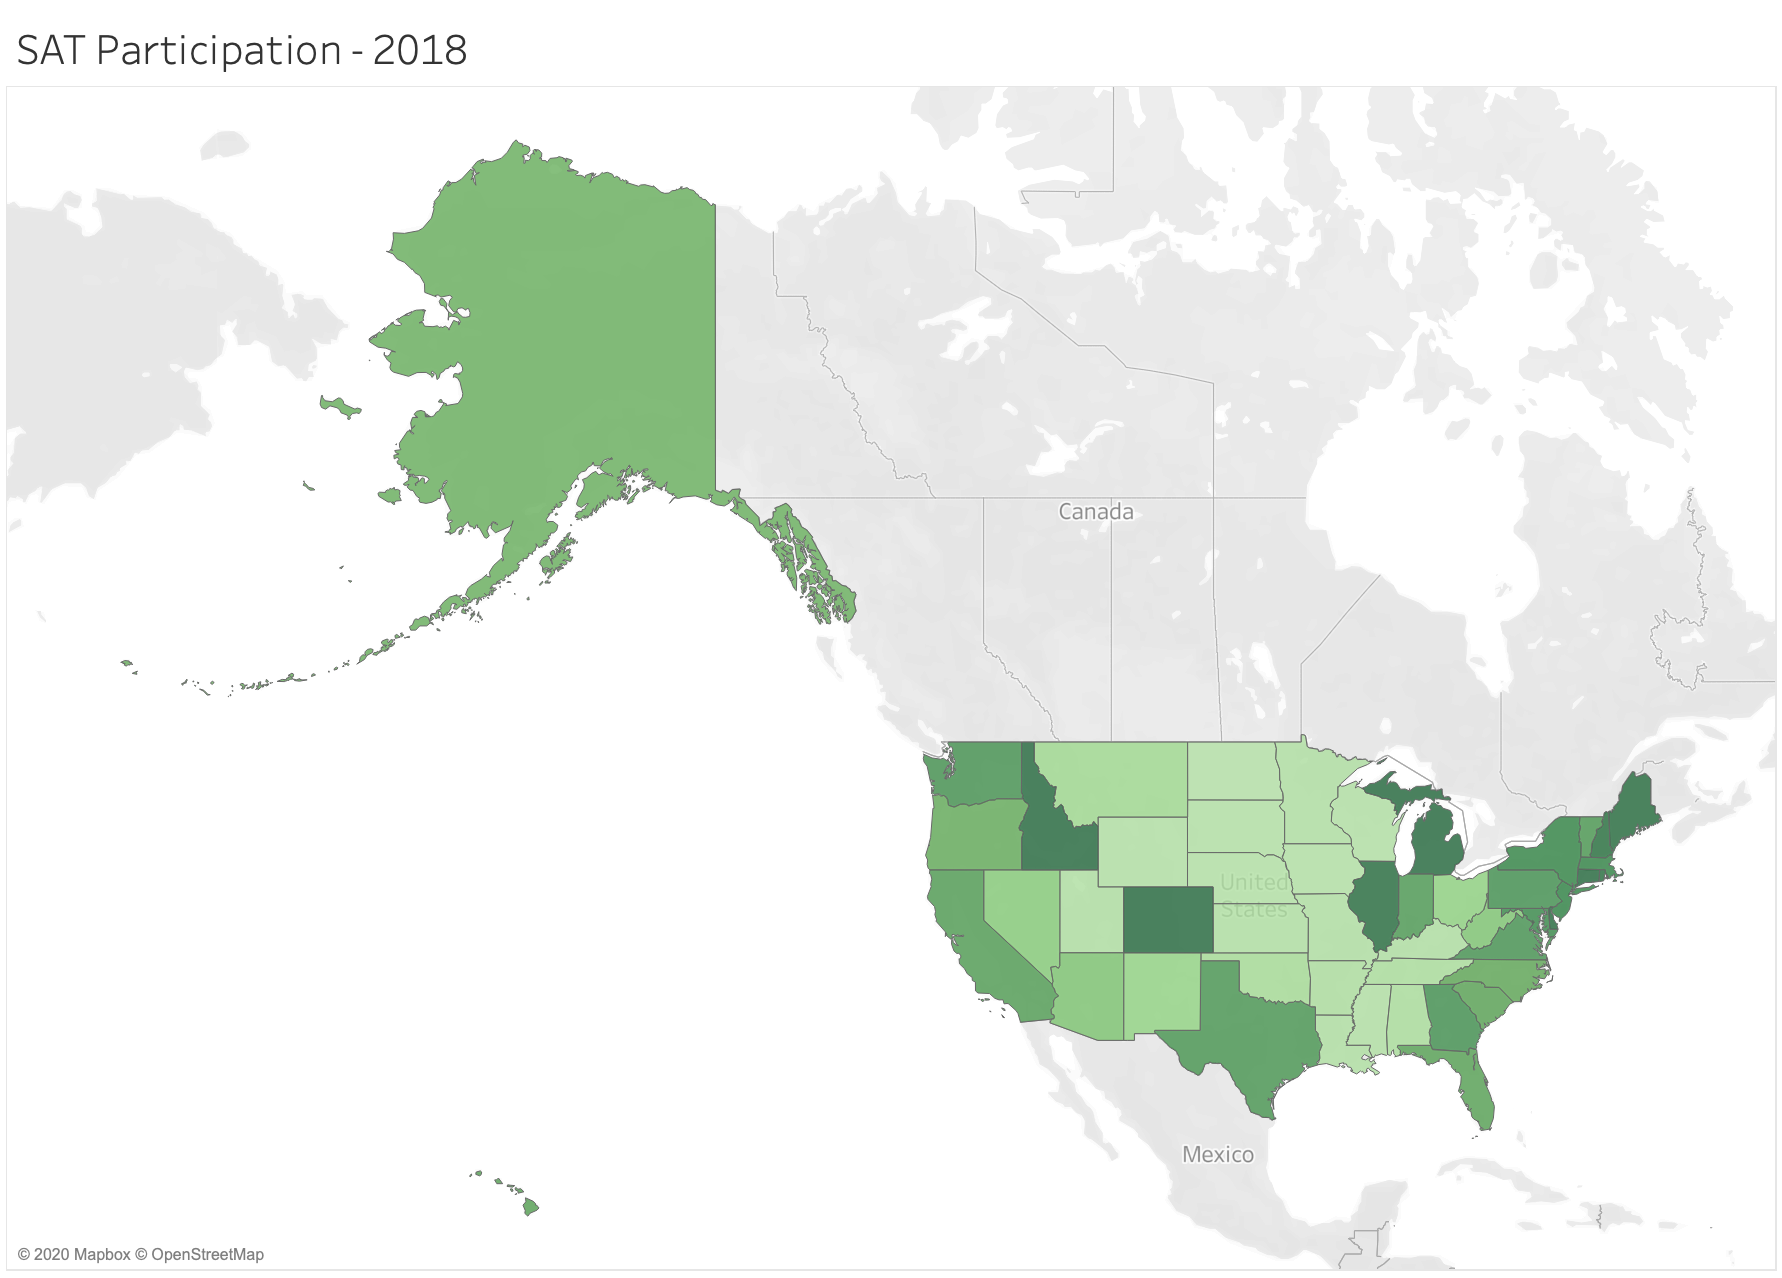

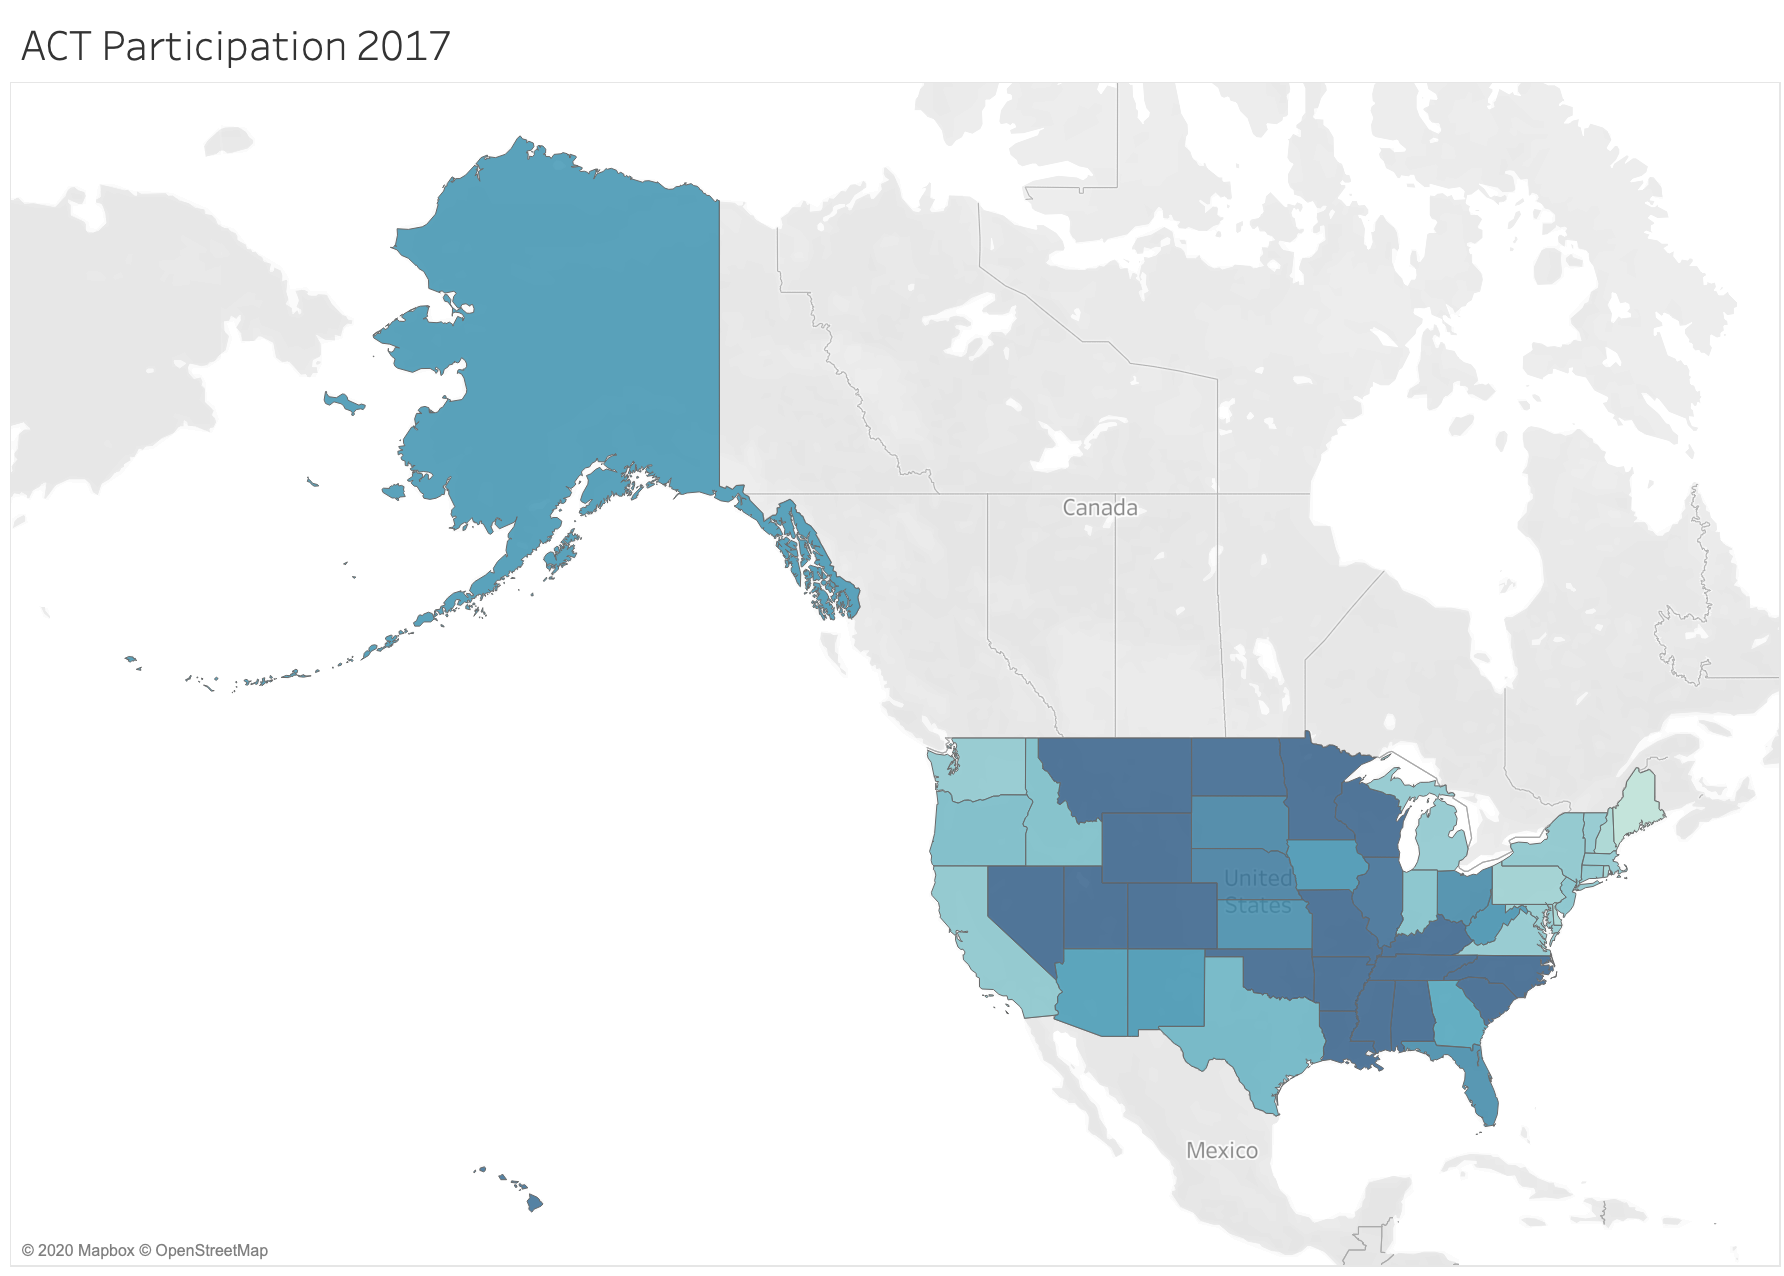

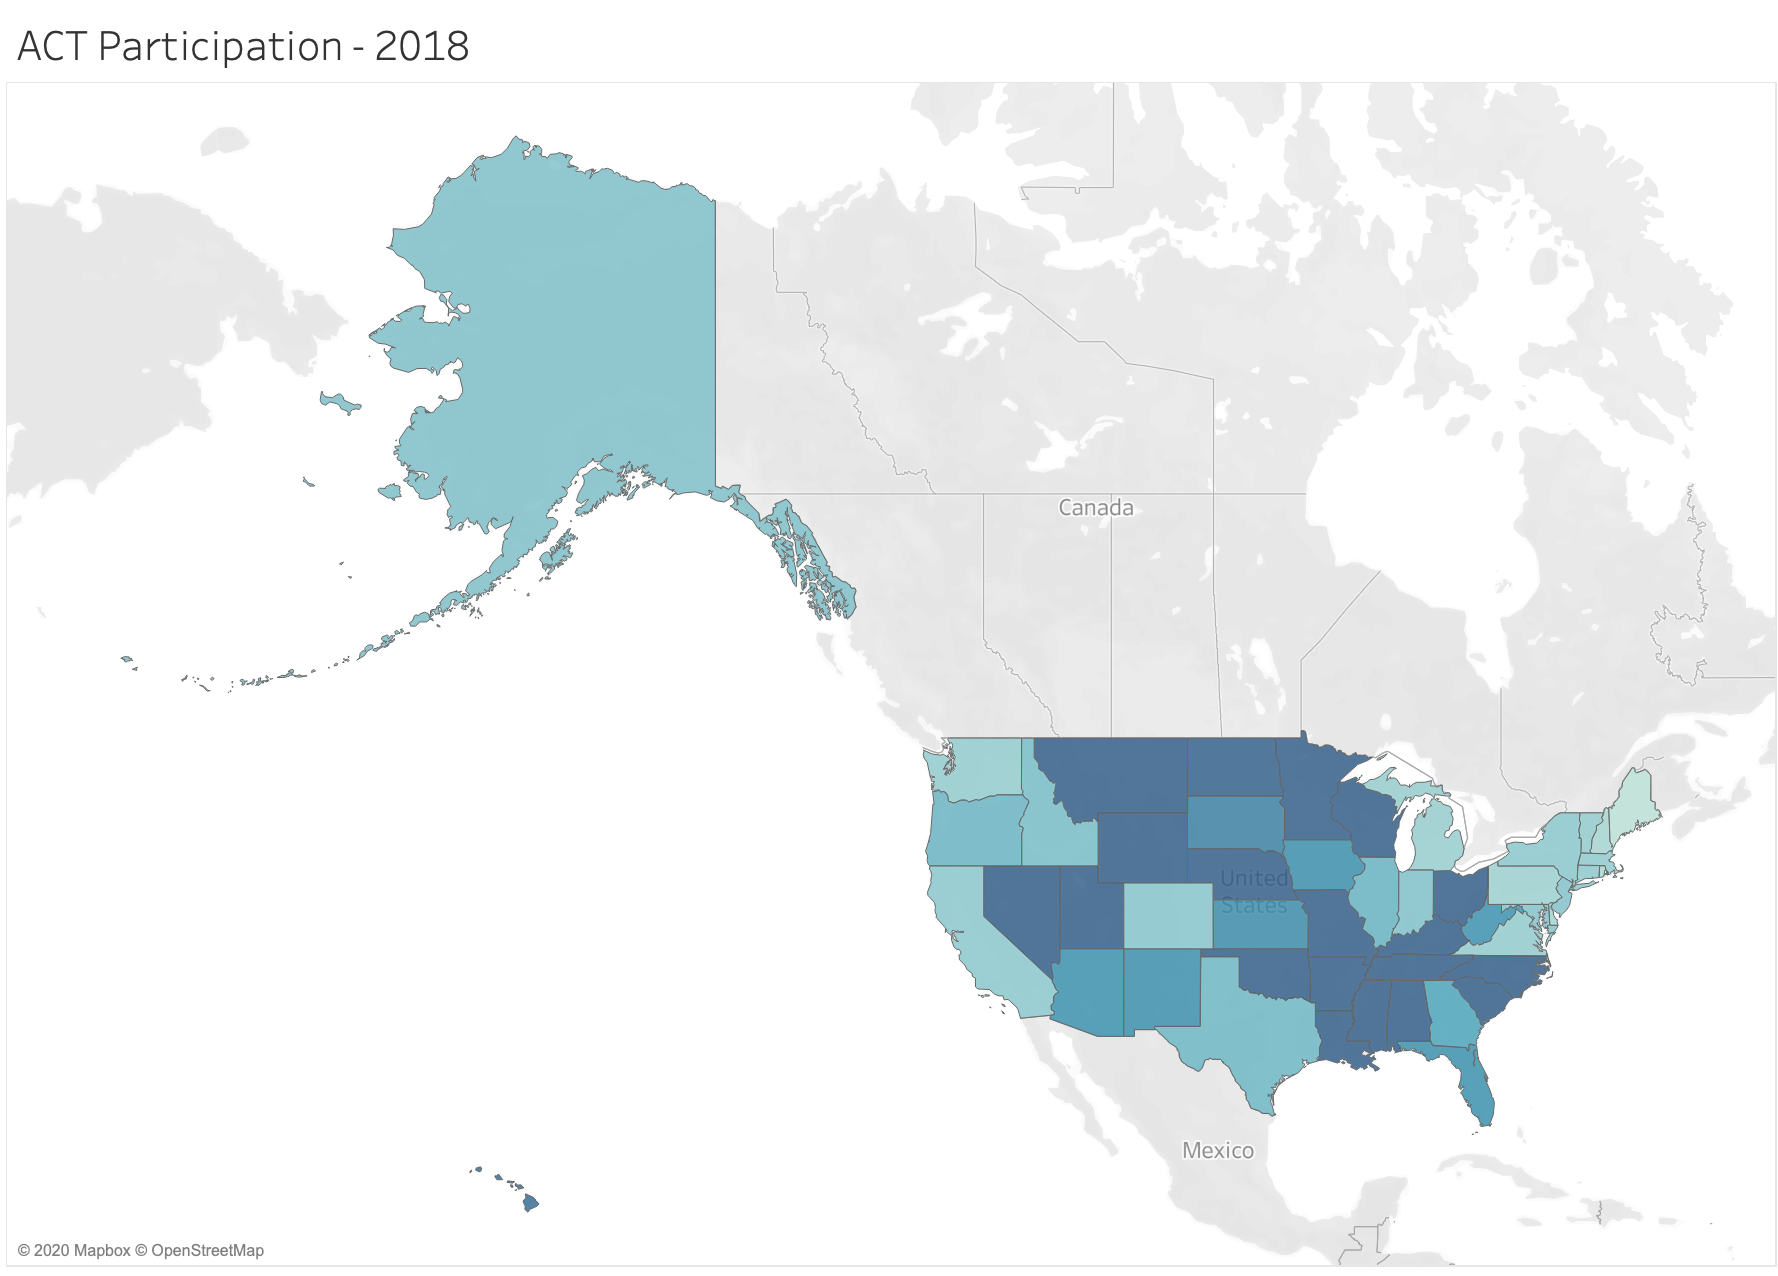

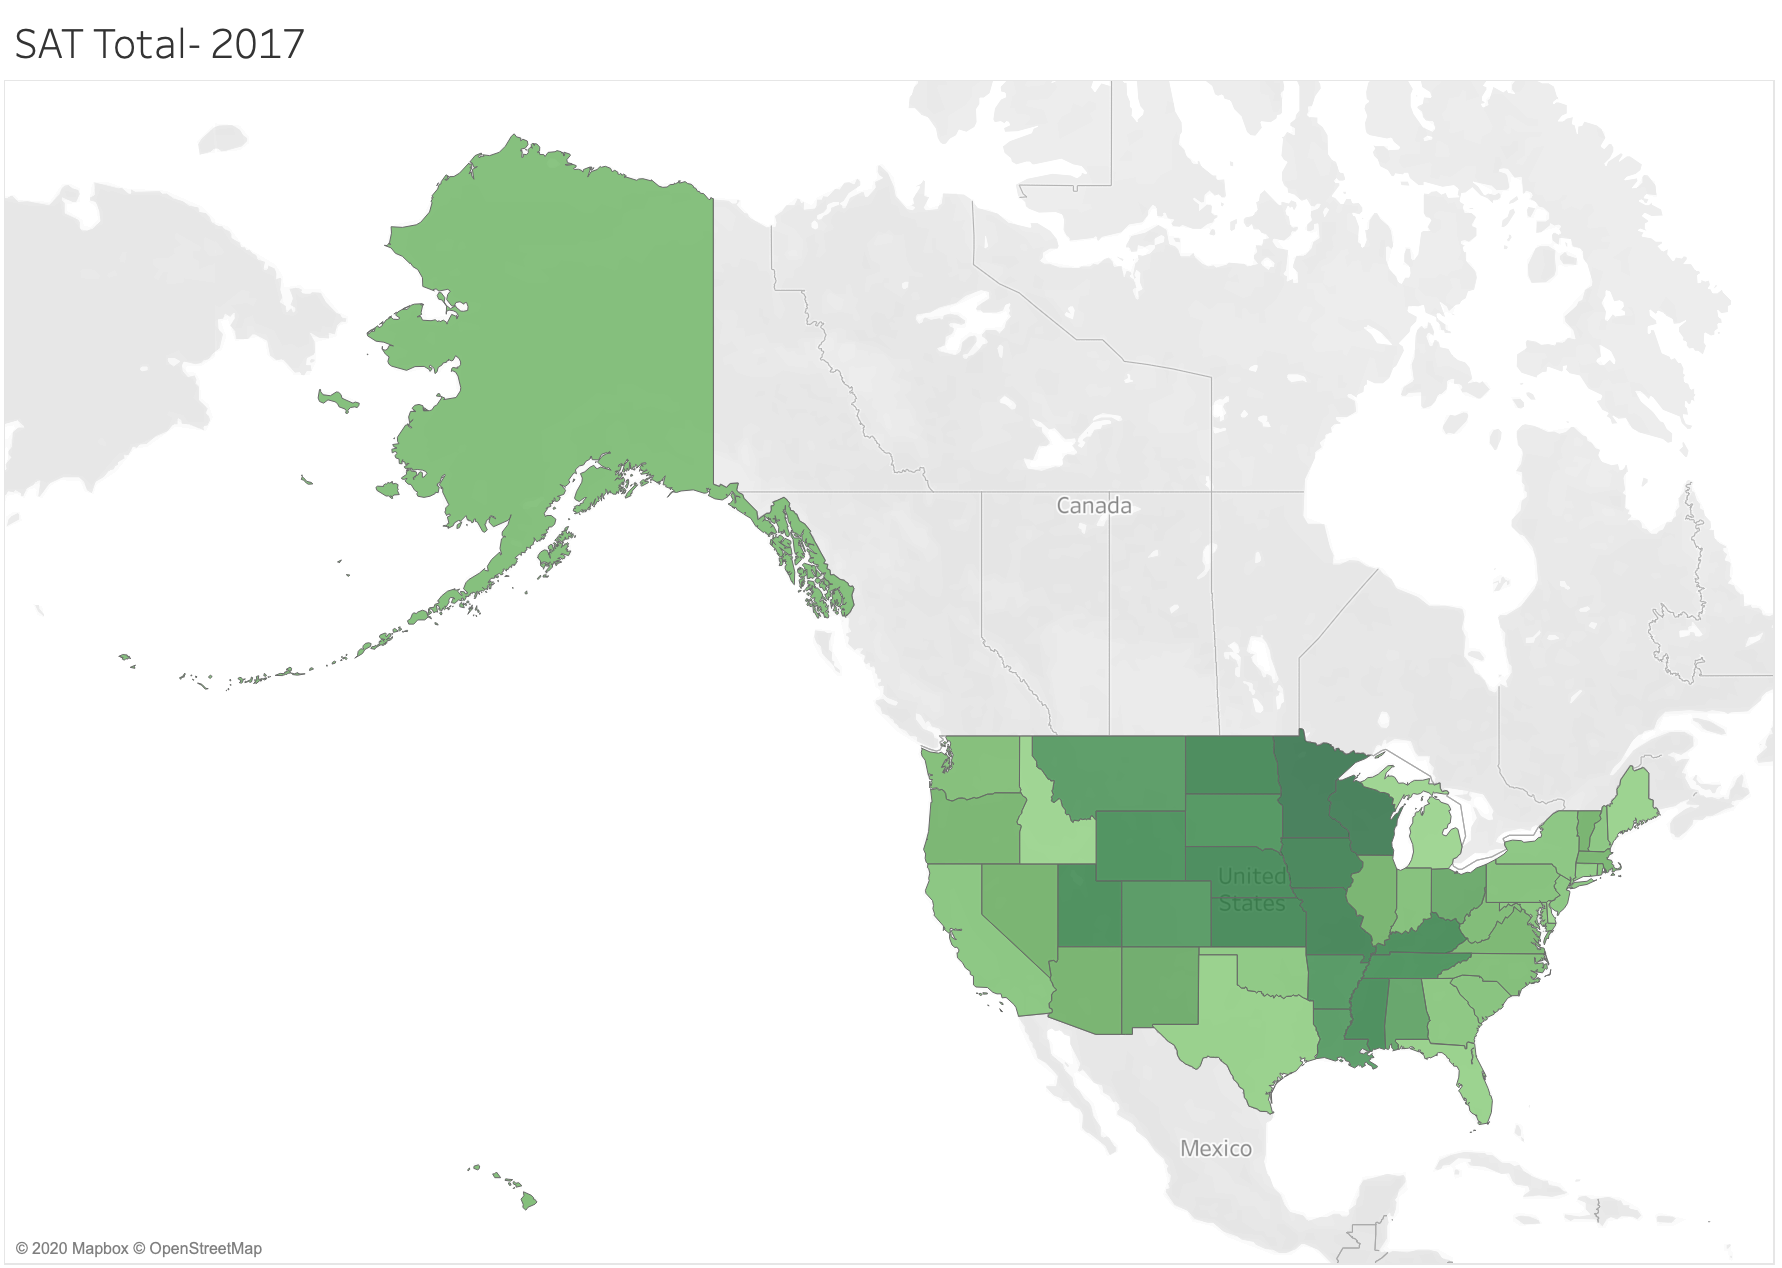

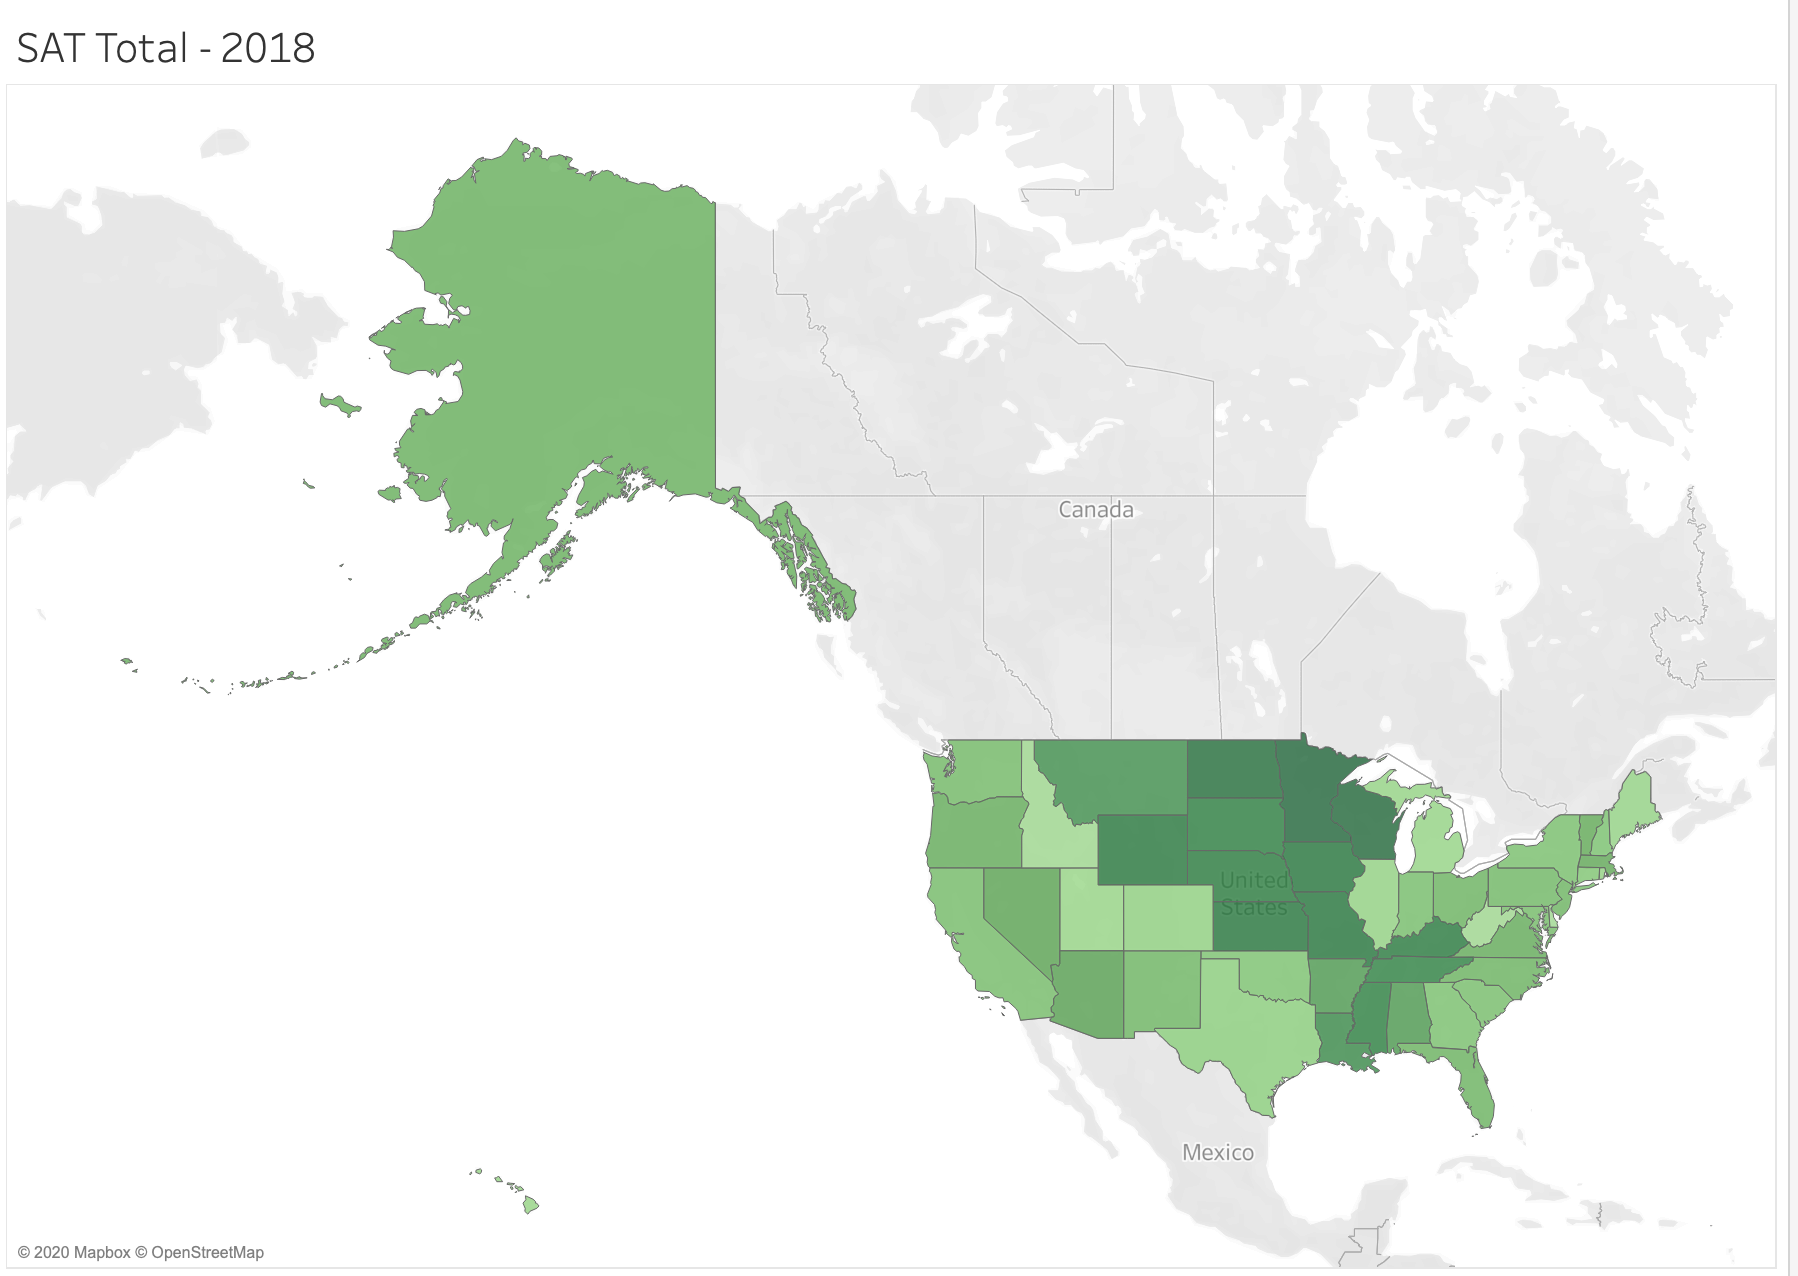

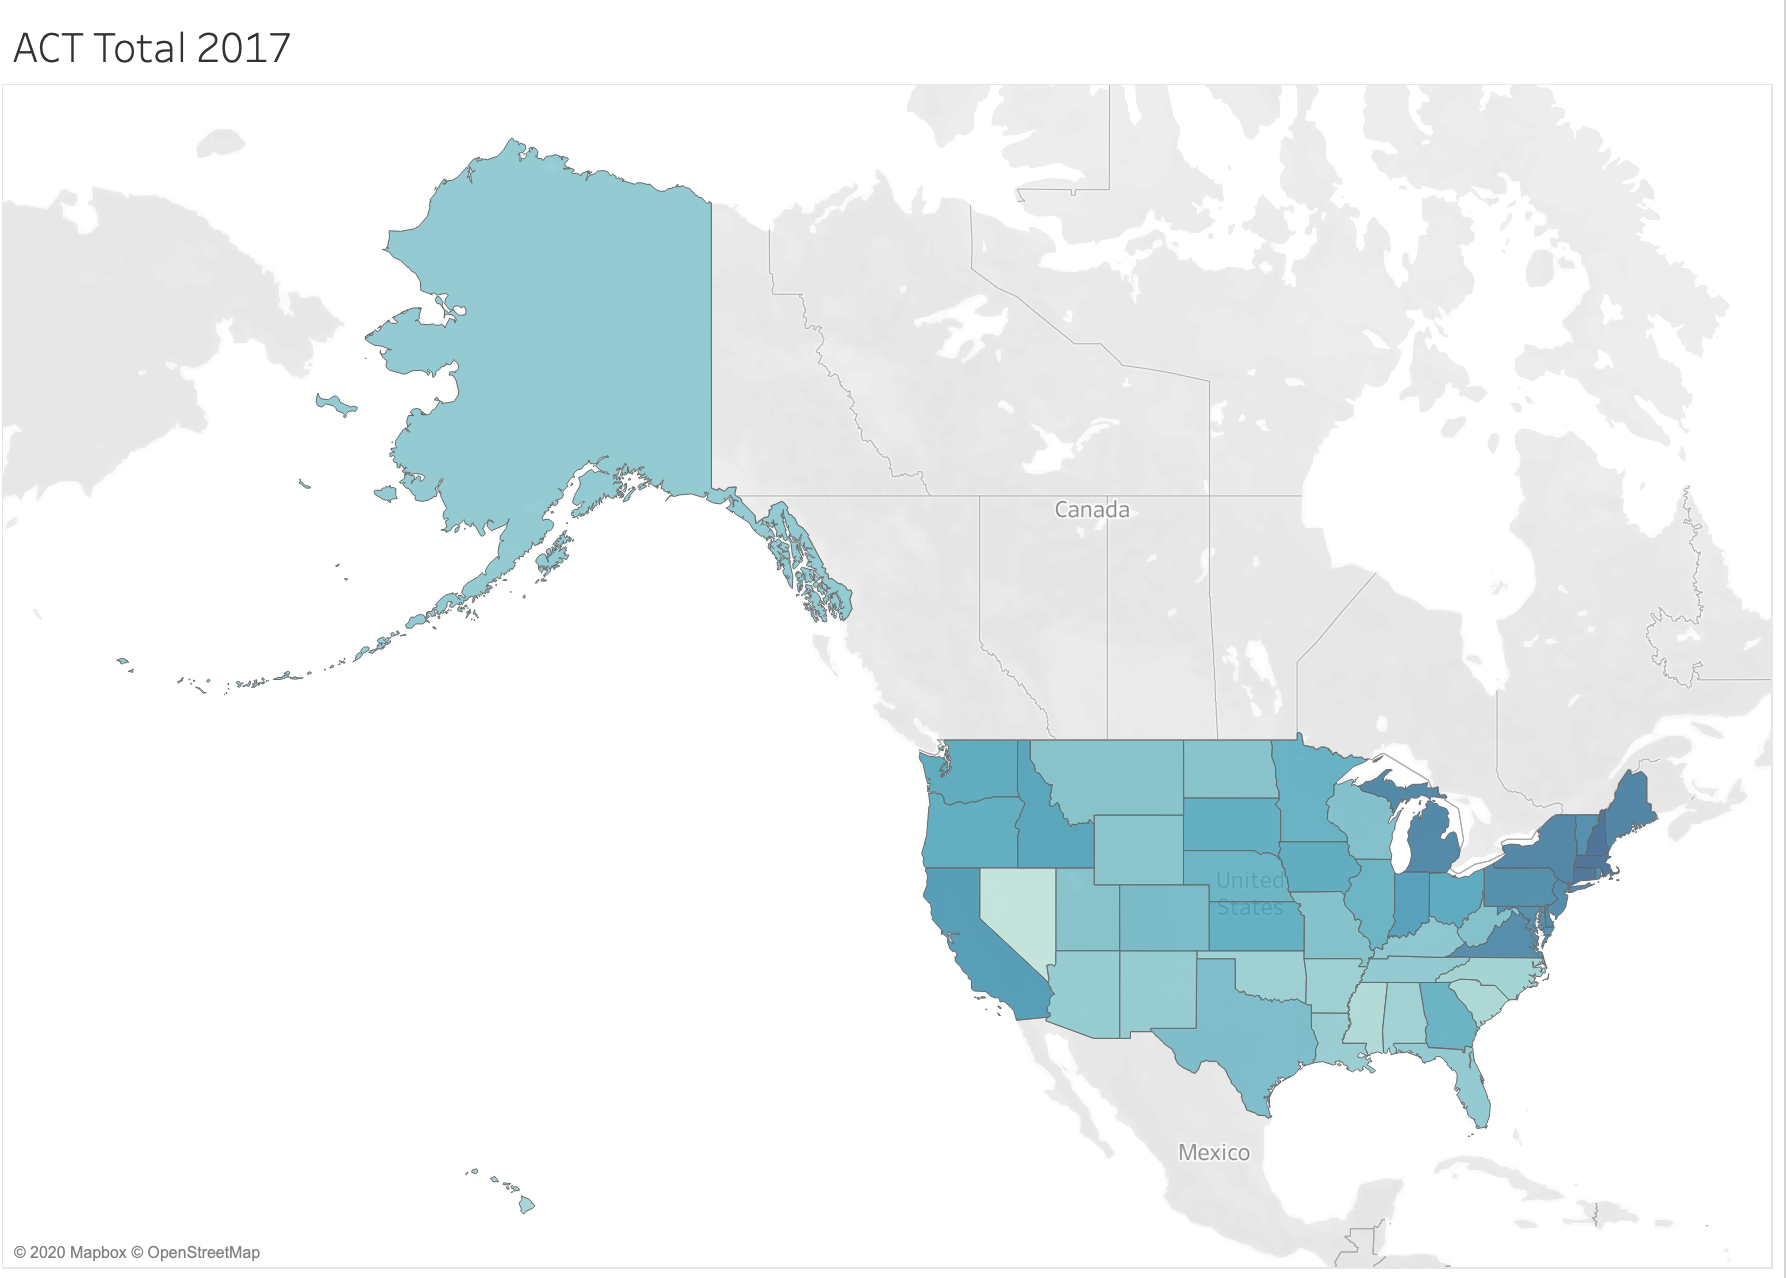

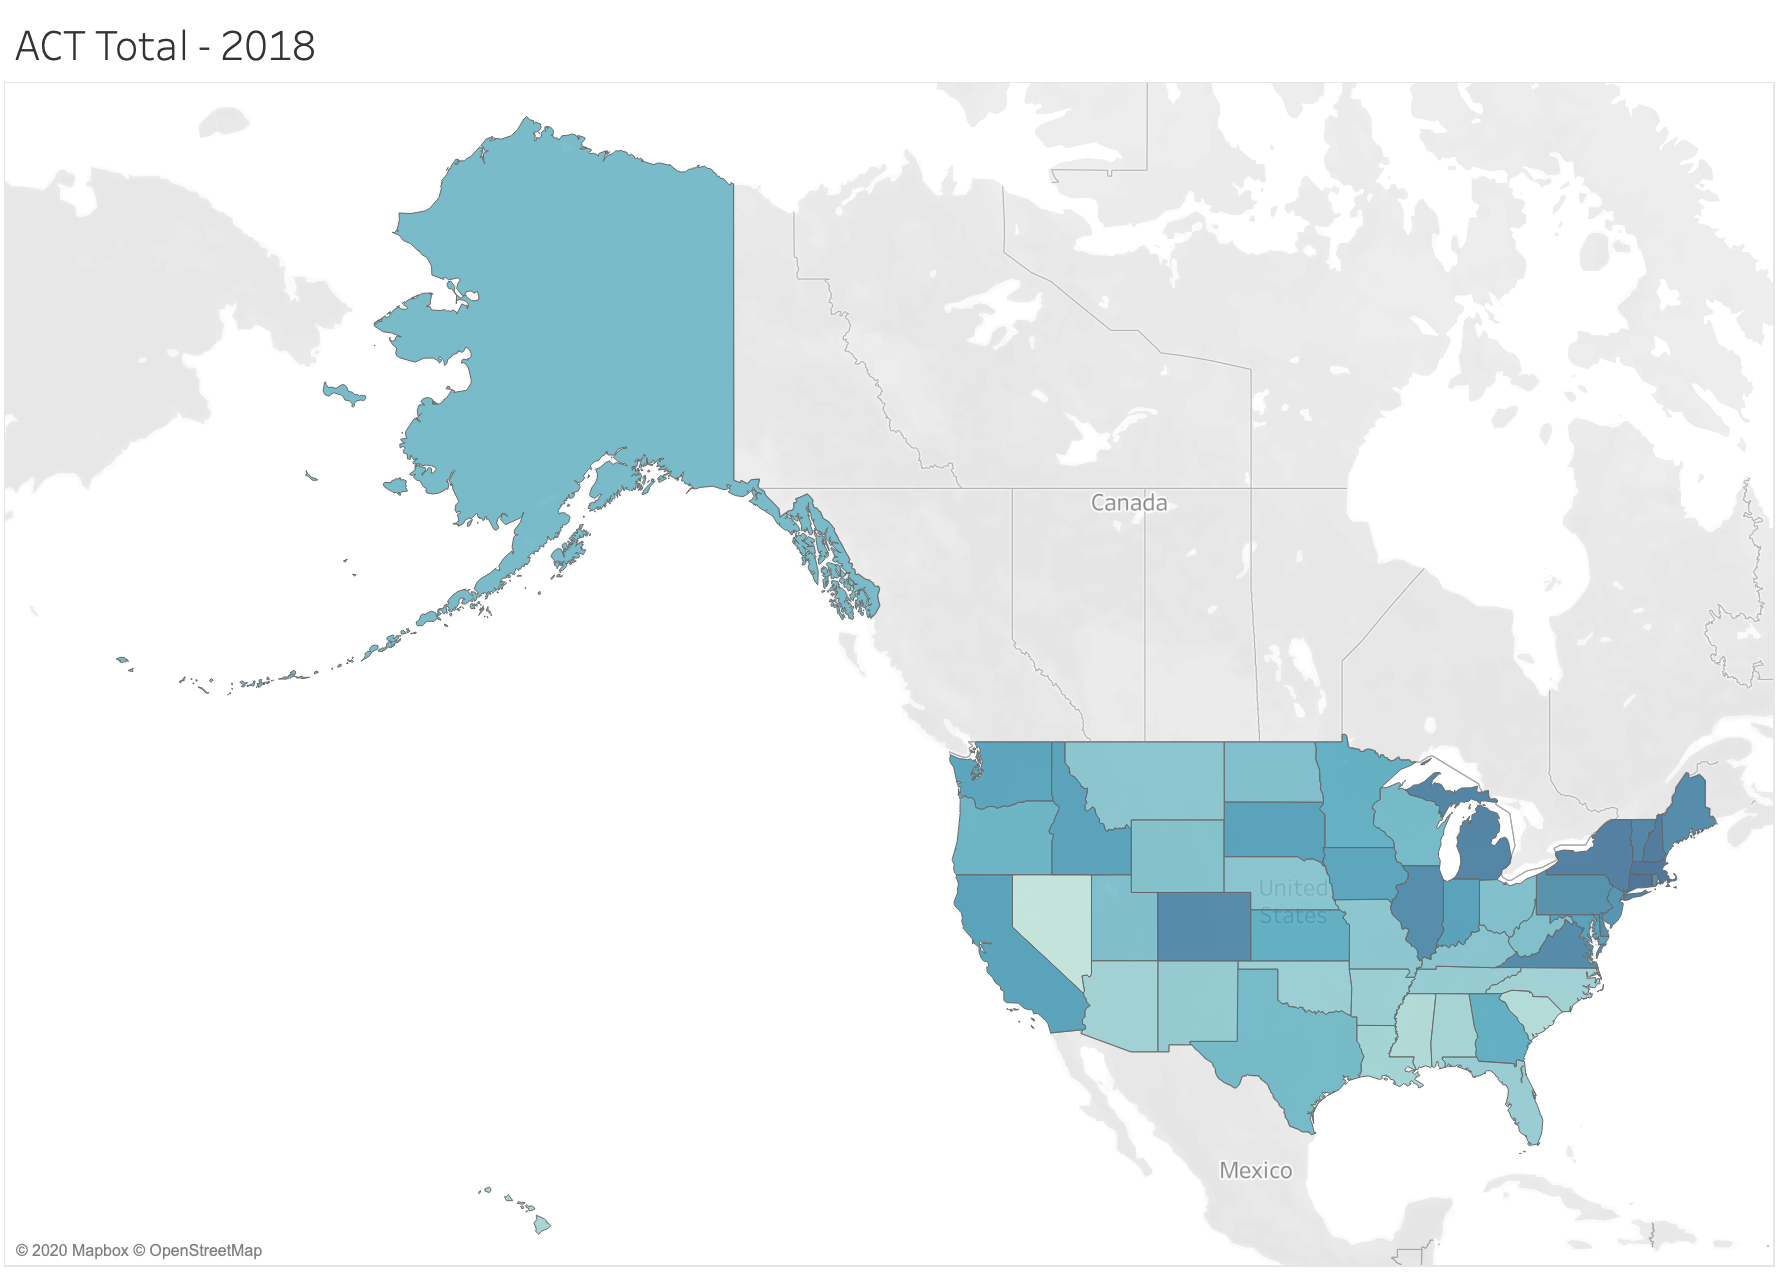

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [110]:
#checking descriptive statistics for SAT participation
final.describe().T

count         mean        std    min      25%     50%  \
sat_participation_2017   51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_ebrw_2017            51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_math_2017            51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_total_2017           51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
act_participation_2017   51.0    65.254902  32.140842    8.0    31.00    69.0   
act_english_2017         51.0    20.931373   2.353677   16.3    19.00    20.7   
act_math_2017            51.0    21.182353   1.981989   18.0    19.40    20.9   
act_reading_2017         51.0    22.013725   2.067271   18.1    20.45    21.8   
act_science_2017         51.0    21.450980   1.739353   18.2    19.95    21.3   
act_composite_2017       51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_participation_2018   51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_ebrw_2018            51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_math_2018            51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_total_2018           51.0  1120.019608  94.155083  977.0  1057.50  1098.0   
act_participation_2018   51.0    61.647059  34.080976    7.0    28.50    66.0   
act_english_2018         51.0    21.486275   2.106278   17.7    19.95    21.3   
act_math_2018            51.0    20.988235   2.446356   16.6    19.10    20.2   
act_reading_2018         51.0    21.125490   2.035765   17.8    19.40    20.7   
act_science_2018         51.0    22.015686   2.167245   18.0    20.45    21.6   
act_composite_2018       51.0    21.345098   1.870114   17.9    19.85    21.1   

                            75%     max  
sat_participation_2017    66.00   100.0  
sat_ebrw_2017            613.00   644.0  
sat_math_2017            599.00   651.0  
sat_total_2017          1212.00  1295.0  
act_participation_2017   100.00   100.0  
act_english_2017          23.30    25.5  
act_math_2017             23.10    25.3  
act_reading_2017          24.15    26.0  
act_science_2017          23.20    24.9  
act_composite_2017        23.60    25.5  
sat_participation_2018    77.50   100.0  
sat_ebrw_2018            610.50   643.0  
sat_math_2018            593.50   655.0  
sat_total_2018          1204.00  1298.0  
act_participation_2018   100.00   100.0  
act_english_2018          23.55    25.6  
act_math_2018             23.70    26.0  
act_reading_2018          23.15    25.2  
act_science_2018          24.10    26.1  
act_composite_2018        23.05    24.9

In [111]:
#custom 'recipe' for stats needed to describe normality
round(final.agg([np.mean, np.median, np.std, np.var, np.min, np.max]), 2).T

amin     amax     mean median    std      var
state                   Alabama  Wyoming      NaN    NaN    NaN      NaN
sat_participation_2017        2      100     39.8     38  35.28  1244.44
sat_ebrw_2017               482      644   569.12    559  45.67  2085.47
sat_math_2017               468      651   556.88    548  47.12  2220.43
sat_total_2017              950     1295   1126.1   1107  92.49  8555.29
act_participation_2017        8      100    65.25     69  32.14  1033.03
act_english_2017           16.3     25.5    20.93   20.7   2.35     5.54
act_math_2017                18     25.3    21.18   20.9   1.98     3.93
act_reading_2017           18.1       26    22.01   21.8   2.07     4.27
act_science_2017           18.2     24.9    21.45   21.3   1.74     3.03
act_composite_2017         17.8     25.5    21.52   21.4   2.02     4.08
sat_participation_2018        2      100    45.75     52  37.31  1392.35
sat_ebrw_2018               480      643   563.69    552   47.5   2256.5
sat_math_2018               480      655   556.24    544  47.77  2282.22
sat_total_2018              977     1298  1120.02   1098  94.16  8865.18
act_participation_2018        7      100    61.65     66  34.08  1161.51
act_english_2018           17.7     25.6    21.49   21.3   2.11     4.44
act_math_2018              16.6       26    20.99   20.2   2.45     5.98
act_reading_2018           17.8     25.2    21.13   20.7   2.04     4.14
act_science_2018             18     26.1    22.02   21.6   2.17      4.7
act_composite_2018         17.9     24.9    21.35   21.1   1.87      3.5

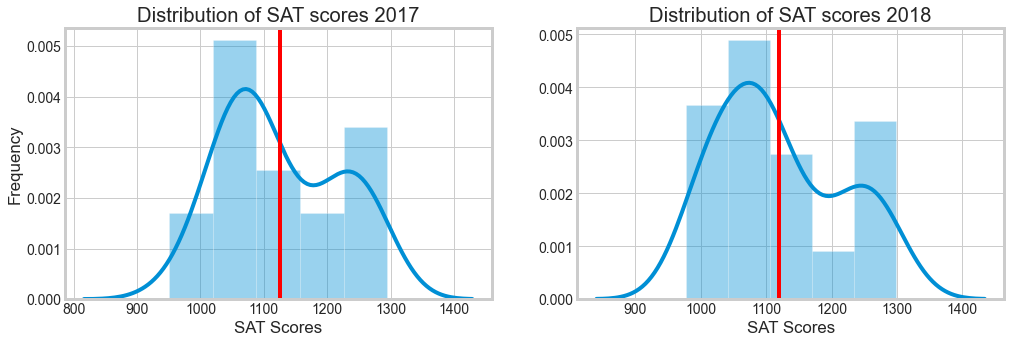

In [112]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['sat_total_2017'])
ax1.axvline(final['sat_total_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Scores')
plt.ylabel('Frequency')
plt.title('Distribution of SAT scores 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2)
sns.distplot(final['sat_total_2018'])
ax2.axvline(final['sat_total_2018'].mean(), color ='red')

# plot titles and labels
plt.xlabel('SAT Scores')
plt.title('Distribution of SAT scores 2018');

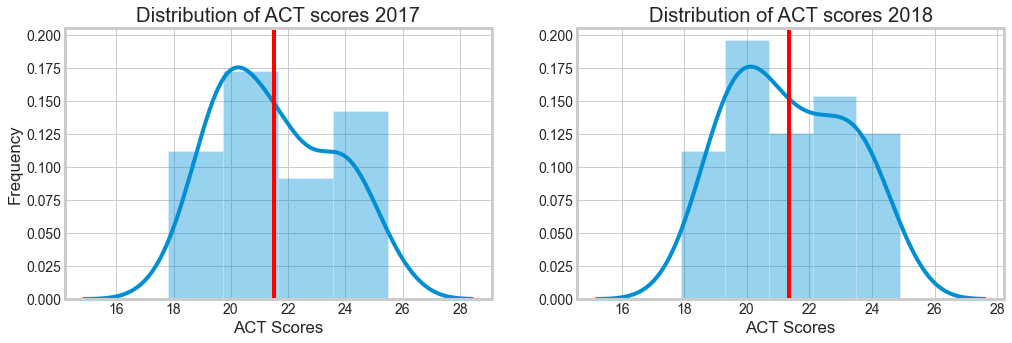

In [113]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['act_composite_2017'])
ax1.axvline(final['act_composite_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Scores')
plt.ylabel('Frequency')
plt.title('Distribution of ACT scores 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2, sharey = ax1)
sns.distplot(final['act_composite_2018'])
ax2.axvline(final['act_composite_2018'].mean(), color ='red')

# plot titles and labels
plt.xlabel('ACT Scores')
plt.title('Distribution of ACT scores 2018');

**We are generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?**

Answer:

We can see normal distributions in  ACT Composite and SAT Total scores for both years, which abides by the central limit theorem - i.e. greater number of tests increase the size of population, and forming closer to a normal distribution. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

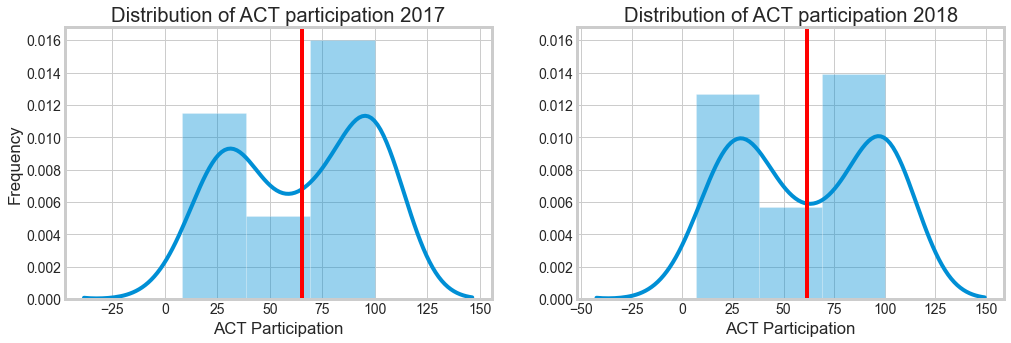

In [114]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['act_participation_2017'])
ax1.axvline(final['act_participation_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Participation')
plt.ylabel('Frequency')
plt.title('Distribution of ACT participation 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2, sharey = ax1)
sns.distplot(final['act_participation_2018'])
ax2.axvline(final['act_participation_2018'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Participation')
plt.title('Distribution of ACT participation 2018');



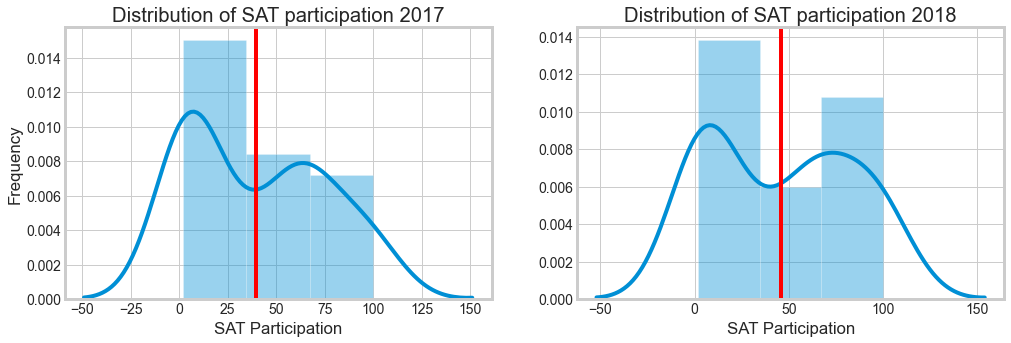

In [115]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['sat_participation_2017'])
ax1.axvline(final['sat_participation_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Participation')
plt.ylabel('Frequency')
plt.title('Distribution of SAT participation 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2)
sns.distplot(final['sat_participation_2018'])
ax2.axvline(final['sat_participation_2018'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Participation')
plt.title('Distribution of SAT participation 2018');





#### Answers:

It is clear that the participation rates do not follow a normal distribution. 

SAT Participation is skewed to the right with a high of 100% and a min of 2%. These stay the same from 2017 to 2018, however, the mean increase by around 7% which implies a shift in distribution as well.


ACT Participation is skewed left while the mean stays about the same.



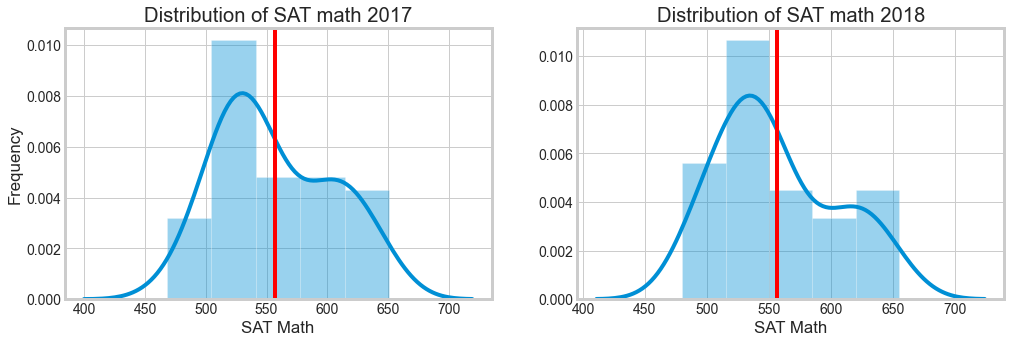

In [116]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['sat_math_2017'])
ax1.axvline(final['sat_math_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Math')
plt.ylabel('Frequency')
plt.title('Distribution of SAT math 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2)
sns.distplot(final['sat_math_2018'])
ax2.axvline(final['sat_math_2018'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Math')
plt.title('Distribution of SAT math 2018');




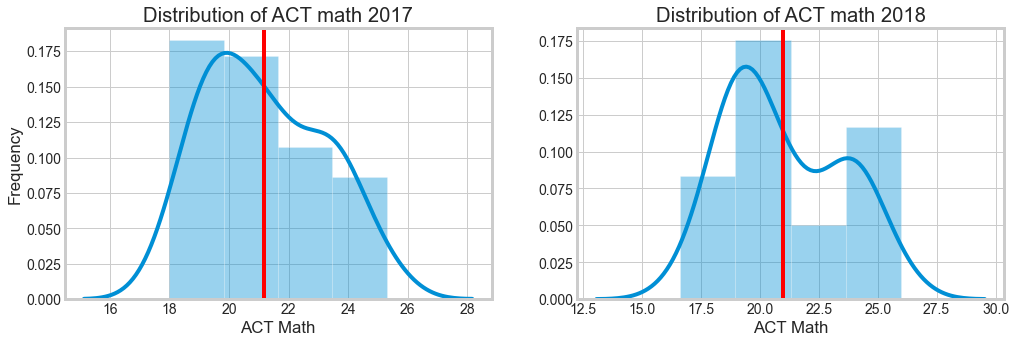

In [117]:
#plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['act_math_2017'])
ax1.axvline(final['act_math_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Math')
plt.ylabel('Frequency')
plt.title('Distribution of ACT math 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2)
sns.distplot(final['act_math_2018'])
ax2.axvline(final['act_math_2018'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Math')
plt.title('Distribution of ACT math 2018');




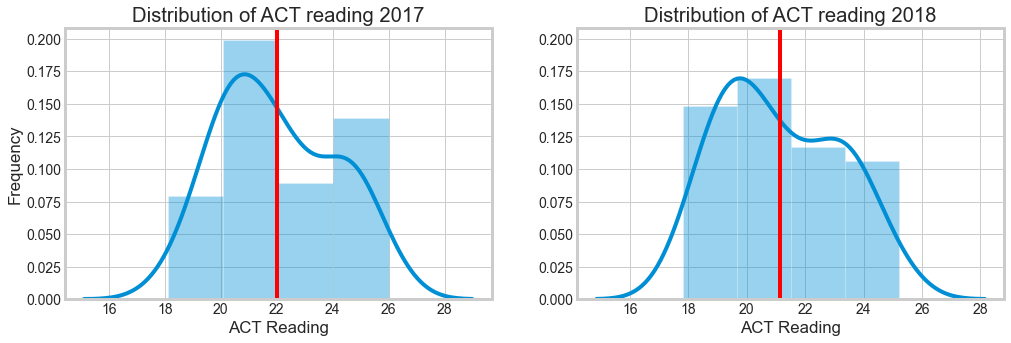

In [118]:
#plot the Figure object
fig = plt.figure(figsize=(15,5), )

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['act_reading_2017'])
ax1.axvline(final['act_reading_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('ACT Reading')
plt.ylabel('Frequency')
plt.title('Distribution of ACT reading 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2, sharey = ax1)
sns.distplot(final['act_reading_2018'])
ax2.axvline(final['act_reading_2018'].mean(), color = 'red')



# plot titles and labels
plt.xlabel('ACT Reading')
plt.title('Distribution of ACT reading 2018');



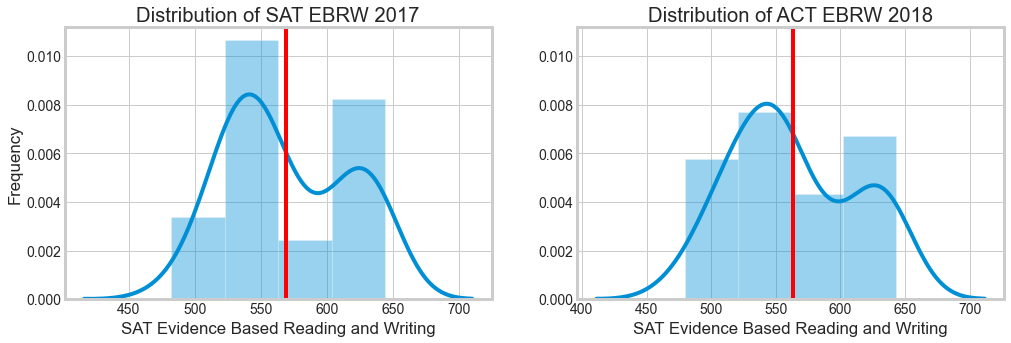

In [119]:
#plot the Figure object
fig = plt.figure(figsize=(15,5), )

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['sat_ebrw_2017'])
ax1.axvline(final['sat_ebrw_2017'].mean(), color = 'red')

# plot titles and labels
plt.xlabel('SAT Evidence Based Reading and Writing')
plt.ylabel('Frequency')
plt.title('Distribution of SAT EBRW 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2, sharey = ax1)
sns.distplot(final['sat_ebrw_2018'])
ax2.axvline(final['sat_ebrw_2018'].mean(), color = 'red')



# plot titles and labels
plt.xlabel('SAT Evidence Based Reading and Writing')
plt.title('Distribution of ACT EBRW 2018');




Answer:

Neither Math nor Reading scores follow normal distribution. However, Math scores tend to have a stronger peak below the mean and are relatively uniform across the distribution, as opposed to have multiple peaks as observed with the Reading Scores.



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

#### Answer:

While it is certainly possible, the sample size of 50 is rather small and may not be robust enough for a proper inference. It could make sense to bootstrap the sample to replicate with a certain degree of randomness, however the more ideal solution would be to have the raw data for participation in SAT and ACT for 2017. 

Given the size of raw data, statistical inference would be more appropriate and have a lower confidence interval.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

Without an authoritative and definitive conversion scale, it does not make sense to compare these SAT and ACT math scores. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [120]:
#hypothesis test to understand if SAT and ACT participation are related - 2017
result = stats.ttest_ind(final['sat_participation_2018'], final['act_participation_2018'])
result.statistic, result.pvalue

(-2.2471737667351626, 0.026826308222090527)

In [121]:
#hypothesis test to understand if SAT and ACT participation are related - 2017
result = stats.ttest_ind(final['sat_participation_2017'], final['act_participation_2017'])
result.statistic, result.pvalue

(-3.8085778908170544, 0.00024134203698662353)

Initial null hypothesis = SAT participation and ACT participation are unrelated  
Alternative null hypothesis = SAT participation and ACT participation are related  

As the p-values of both the above tests are below 0.05, we can reject the null hypothesis.  

It can be inferred that poaching market share from ACT would be benefit for SAT participation.

In [122]:
#hypothesis test to understand if SAT participation and scores are related - 2017
result = stats.ttest_ind(final['sat_participation_2017'], final['sat_total_2017'])
result.statistic, result.pvalue

(-78.36559565424048, 1.3835783726906659e-91)

In [123]:
#hypothesis test to understand if SAT participation and scores are related - 2018
result = stats.ttest_ind(final['sat_participation_2018'], final['sat_total_2018'])
result.statistic, result.pvalue

(-75.74934651667225, 3.9035811071156407e-90)

Initial null hypothesis = SAT participation and SAT scores are unrelated  
Alternative null hypothesis = SAT participation and SAT scores are related  

As the p-values of both the above tests are more than 0.05, we cannot reject the null hypothesis.  

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [124]:
#filtering for the 3 key states of interest identified through EDA - 
final[['state', 'sat_participation_2017','sat_participation_2018', 'act_participation_2017', 'act_participation_2018' ]][(final['state'] == 'Illinois') | (final['state'] == 'Colorado') | (final['state'] == 'Ohio')] 

state  sat_participation_2017  sat_participation_2018  \
5   Colorado                    11.0                   100.0   
13  Illinois                     9.0                    99.0   
35      Ohio                    12.0                    18.0   

    act_participation_2017  act_participation_2018  
5                    100.0                    30.0  
13                    93.0                    43.0  
35                    75.0                   100.0

Preliminary desk research shows that both Colorado and Illinois switched to SAT as a mandatory exam in 2017

Similarly, Ohio also made the ACT mandatory in 2017.

It is evident that state-wide incentives drive higher participation rates for both exames, and lead to a decrease in particpation for the other. This may be a worthwhile strategy to pursue for SAT.

Sources-   
1)https://www.testive.com/colorado-sat-change-2017/  
2)https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html  
2)https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/  

In [125]:
#creating new DF for states of interest that can drive growth for SAT
states_of_interest = final[['state','sat_participation_2017', 'sat_participation_2018']][(final['sat_participation_2017'] < 10) & (final['sat_participation_2018'] < 10)]

In [126]:
states_of_interest

state  sat_participation_2017  sat_participation_2018
0        Alabama                     5.0                     6.0
3       Arkansas                     3.0                     5.0
15          Iowa                     2.0                     3.0
16        Kansas                     4.0                     4.0
17      Kentucky                     4.0                     4.0
18     Louisiana                     4.0                     4.0
23     Minnesota                     3.0                     4.0
24   Mississippi                     2.0                     3.0
25      Missouri                     3.0                     4.0
27      Nebraska                     3.0                     3.0
34  North Dakota                     2.0                     2.0
36      Oklahoma                     7.0                     8.0
41  South Dakota                     3.0                     3.0
42     Tennessee                     5.0                     6.0
44          Utah                     3.0                     4.0
49     Wisconsin                     3.0                     3.0
50       Wyoming                     3.0                     3.0

In [127]:
states_of_interest.drop([0,17,18, 24, 25, 27, 34, 44, 49, 50] , inplace = True)

#manually dropping states with mandatory ACT contracts in 2018. 
#source - https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

In [128]:
#displaying target states as a dataframe
states_of_interest

state  sat_participation_2017  sat_participation_2018
3       Arkansas                     3.0                     5.0
15          Iowa                     2.0                     3.0
16        Kansas                     4.0                     4.0
23     Minnesota                     3.0                     4.0
36      Oklahoma                     7.0                     8.0
41  South Dakota                     3.0                     3.0
42     Tennessee                     5.0                     6.0

In [129]:
#saving to csv
states_of_interest.to_csv('../data/states_of_interest.csv')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

At first glance, with the lowest participation 2 years in a row, North Dakota may appear to be a prime candidate for improvement. However, as the ACT is mandatory in North Dakota (and many other states) this will not be a feasible target for SAT.

Based on data-driven insight, this analysis has narrowed down to 7 target states which do not have an existing affiliation with either SAT or ACT. 

Source -  
1)https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html

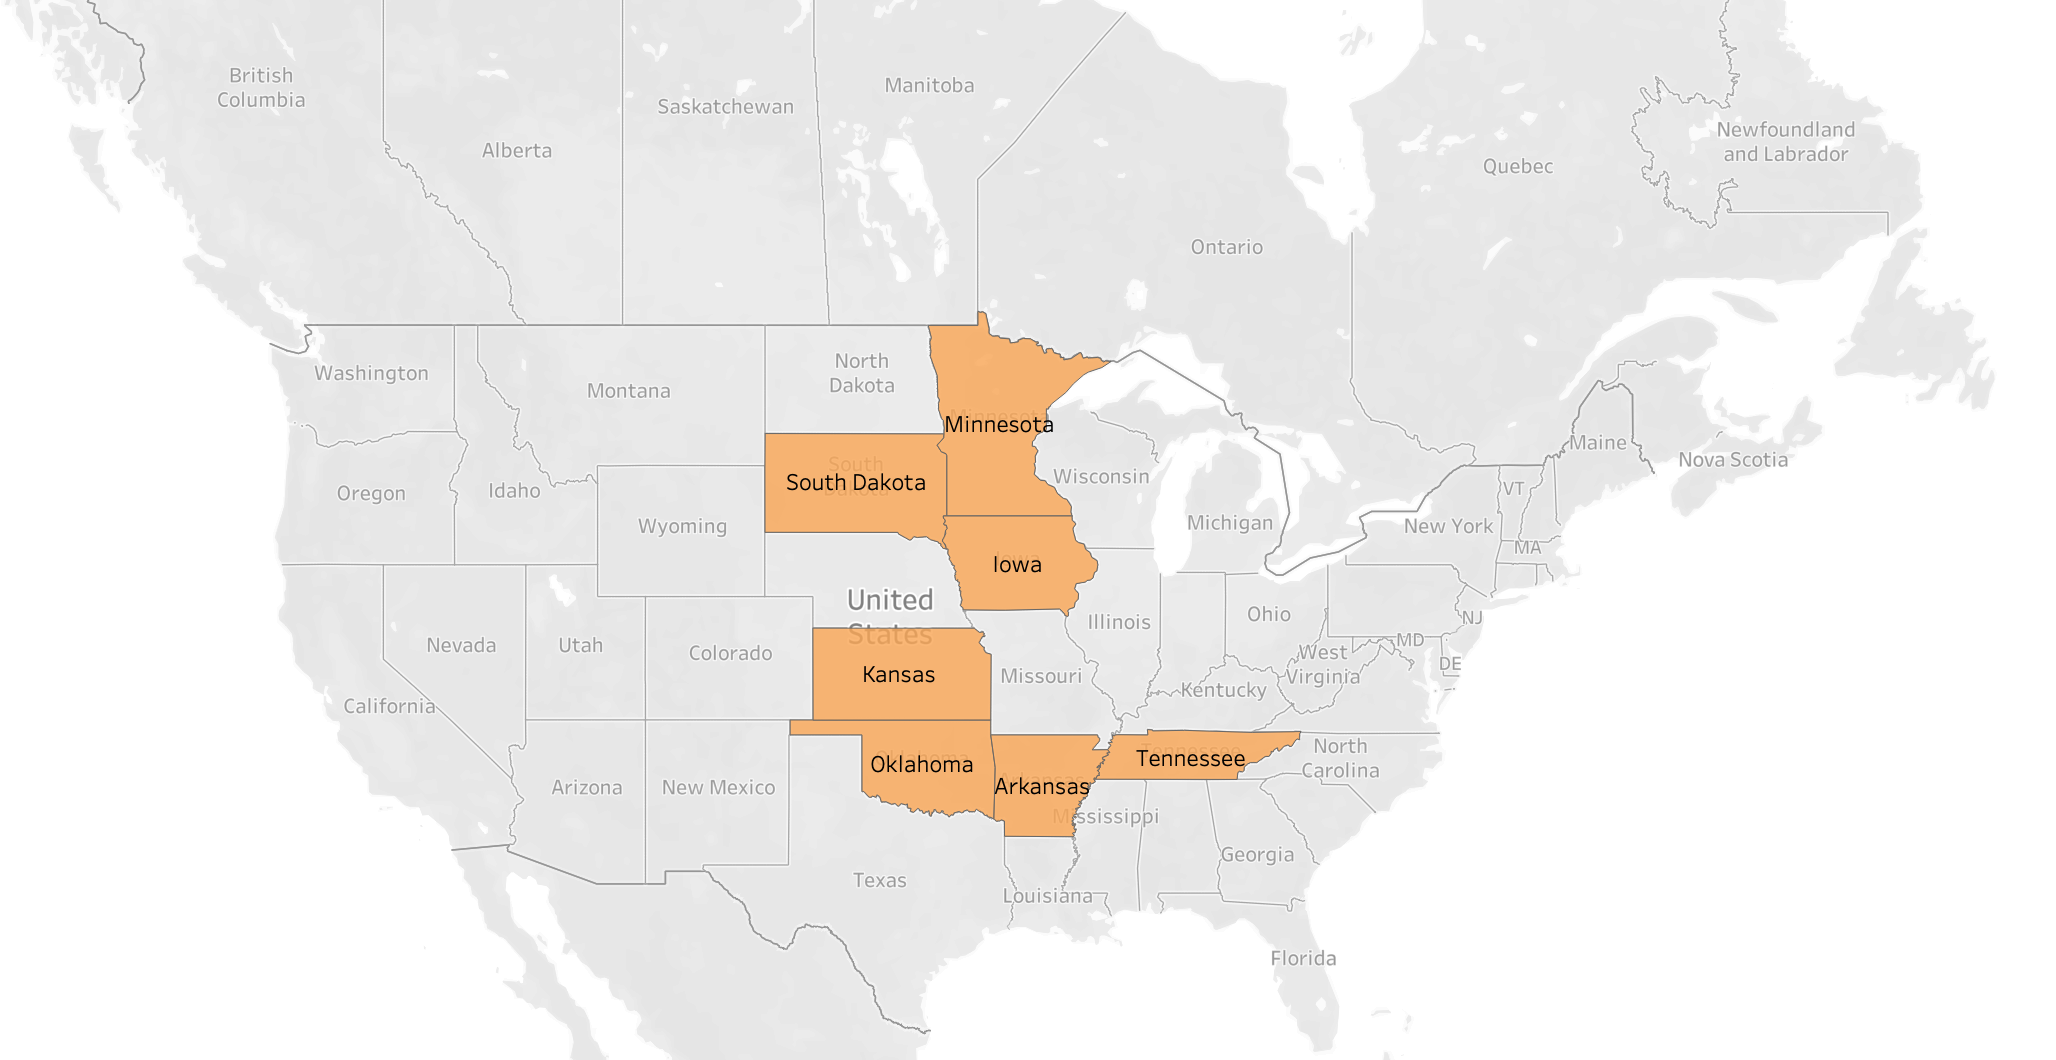

With average ACT participation (non-mandatory), it may be possible to lobby the respective boards of education in order to provide state-level funding for the SAT to provide students for free, or even require it to be mandatory. Based on data across the nation as well as observational evidence, providing such incentives can drive participation across the state. 